In [2]:
from astropy.table import Table
import matplotlib.pyplot as plt
import math
import numpy
from numpy import loadtxt
#Imports possibly useful software for Python
t=Table.read('Tgas200_Wright2003_2MASS_FinCat_out.vot')
#t=Table.read('TGAS_d125_Wright03_2Mass.vot')
#Defines t as this table
print("The columns within this catalog are: ")
print(t.colnames)
#Prints out all of the column names for easy reference
Jmag=t["Jmag"]
#Defines Jmag from the Jmag array
Hmag=t["Hmag"]
#Defines Hmag from the Hmag array
Kmag=t["Kmag"]
#Defines Kmag from the Kmag array
Vmag=t["VTmag"]
#Defines Vmag from the array VTmag in the table
Gmag=t["X.Gmag."]
#Defines Gmag from the __Gmag_ array
Bmag=t["BTmag"]
#Defines Bmag from the BTmag array
Jmagerror=t["e_Jmag"]
#Defines the J magnitude error from the table
Hmagerror=t["e_Hmag"]
#Defines the H magnitude error from the table
Kmagerror=t["e_Kmag"]
#Defines the K magnitude error from the table
SpType=t["SpType"]
#Defines SpectralType from the table
QFlags=t["Qfl"]
#Defines QFlags from the Qfl array
Source=t["Source"]
#Defines Source from the table array
HipparcosIdentifier=t["HIP"]
#Defines HipparcosIdentifier from the HIP array

The columns within this catalog are: 
['col1', 'angDist', 'd_arcsec', 'X_RAJ2000', 'X_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'X.FG.', 'e_.FG.', 'X.Gmag.', 'Var', 'X_RAJ2000.1', 'X_DEJ2000.1', 'TYC1', 'TYC2.1', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', 'X2MASS', 'RAJ2000.1', 'DEJ2000.1', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


In [32]:
for i in range(0,len(QFlags)):
    if(QFlags[i][0]==ord("A")):
         Jmag.mask[i]=False
         Jmagerror.mask[i]=False
    else:
         Jmag.mask[i]=True
         Jmagerror.mask[i]=True
         #SpType.mask[i]=True
#The first character of QFlags represents J. Checks whether the first character is A. If it is, the mask on that element
#should be false (off), and if it isn't, the mask on that element should be true (on).
for i in range(0,len(QFlags)):
    if(QFlags[i][1]==ord("A")):
         Hmag.mask[i]=False
         Hmagerror.mask[i]=False
    else:
         Hmag.mask[i]=True
         Hmagerror.mask[i]=True
         #SpType.mask[i]=True
#The second character of QFlags represents H. Checks whether the first character is A. If it is, the mask on that element
#should be false (off), and if it isn't, the mask on that element should be true (on).
for i in range(0,len(QFlags)):
    if(QFlags[i][2]==ord("A")):
         Kmag.mask[i]=False
         Kmagerror.mask[i]=False
    else:
         Kmag.mask[i]=True
         Kmagerror.mask[i]=True
         #SpType.mask[i]=True
#The third character of QFlags represents K. Checks whether the first character is A. If it is, the mask on that element
#should be false (off), and if it isn't, the mask on that element should be true (on).

In [33]:
Duplicates=t["Dup"]
#Defines Duplicates from the array of duplicates Dup in the table
DuplicateMask=0
for i in range(0,len(Duplicates)):
    if Duplicates[i]>0.5:
        DuplicateMask=DuplicateMask+1
        Row=t[i]
        Index=Row._index
        Columns=row._table.columns.values()
        for j in Columns:
            Columns.mask[i]=True
for k in range(0,len(Duplicates)):
    if Duplicates[k]>0.5:
        print(k,Duplicates[k])

In [34]:
Distance=1000./t["Plx"]
#Defines the distance to the stars
Jabsmag=Jmag+5-5*numpy.log10(Distance)
Habsmag=Hmag+5-5*numpy.log10(Distance)
Kabsmag=Kmag+5-5*numpy.log10(Distance)
Gabsmag=Gmag+5-5*numpy.log10(Distance)
Vabsmag=Vmag+5-5*numpy.log10(Distance)
Babsmag=Bmag+5-5*numpy.log10(Distance)

In [35]:
TranslatedLuminosityClass=[0.0]*len(SpType)
#Makes this an array of 0's with the same length as SpectralType
for i in range(0,len(SpType)):
    SpT=SpType[i].decode()
    if len(SpT)>2:
        for j in range(0,len(SpT)):
            if SpT[j]=='I':
                TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]+1
            if SpT[j]=='V':
                TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]+5
            if SpT[j]=='+':
                TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]-30
    else:
        TranslatedLuminosityClass[i]=5.1
    if TranslatedLuminosityClass[i]==6:
        TranslatedLuminosityClass[i]=4
    if TranslatedLuminosityClass[i]==11:
        TranslatedLuminosityClass[i]=4.5
    if TranslatedLuminosityClass[i]==9:
        TranslatedLuminosityClass[i]=3.5
    if TranslatedLuminosityClass[i]>5.2:
        TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]-30
#Runs a loop that "translates" luminosity classes into Arabic numerals, 5.1 for no class, negative numbers for binaries or weird stars, or half-integer numbers for slash stars
BinariesOrUnknownClass=0
#Sets this number at 0
for k in range(0,len(SpType)):
    if TranslatedLuminosityClass[k]<0 or TranslatedLuminosityClass[k]>5:
        BinariesOrUnknownClass=BinariesOrUnknownClass+1
        #Adds 1 to number of binary/unknwon luminosity class stars for "translated" class less than 0 or greater than 5
SingleStarsWithKnownLuminosityClass=len(SpType)-BinariesOrUnknownClass
print('The number of single stars with known luminosity class is: ')
print(SingleStarsWithKnownLuminosityClass)
print('The number of binary stars or stars with unknown luminosity class is: ')
print(BinariesOrUnknownClass)
#Prints out the number of single stars with known luminosity class, and binary stars or stars without a luminosity class
print('The "translated" luminosity classes are: ')
print(TranslatedLuminosityClass)
#Prints out the vector of "translated" luminosity class numbers
#Luminosity classes get turned into number from 1 to 5
#Stars with no luminosity class have "translated" class 5.1
#Unknown spectral type stars and binary stars have negative "translated" class numbers
#Stars with "translated" class numbers halfway between numbers (i.e. 3.5, 4.5, etc.) had slashes (i.e. III/IV)

The number of single stars with known luminosity class is: 
27501
The number of binary stars or stars with unknown luminosity class is: 
22592
The "translated" luminosity classes are: 
[5.1, 5.1, 5.0, 5.1, 3.0, 5.1, 5.1, 5.1, 5.1, 5.0, 0.0, 5.1, 3.0, 5.1, 5.0, 5.1, 4, 5.1, 3.0, 3.5, 5.0, 5.1, 5.1, 5.0, 5.1, 5.1, 5.0, 5.1, 5.0, 5.0, 5.0, 5.0, 4, 5.0, 3.0, 5.1, 5.1, 5.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.0, 5.0, 5.1, 4, 4, 5.1, 5.0, 5.0, 5.0, 5.1, 5.1, 5.0, 5.0, 5.1, 5.0, 5.0, 5.1, 4, 5.0, 3.0, 5.0, 3.5, 5.1, 4, -30.0, 5.0, 5.1, 5.0, 5.0, 4.5, 5.0, 5.1, 5.0, 5.1, 5.1, 4.5, 5.0, 5.0, 4, 5.0, 5.0, 3.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.1, 5.0, 5.0, 5.1, 5.0, 5.0, 5.1, 5.0, 5.0, 5.0, 5.1, 5.0, 5.1, 3.0, 5.0, 5.1, 4, 3.0, 5.0, 5.0, 0.0, 5.0, 5.0, 3.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.0, 5.0, 5.0, 5.1, 5.0, 4.5, 5.1, -25.0, 5.1, 5.1, 5.0, 3.5, 5.0, 5.0, 5.0, 5.0, 5.1, 5.0, 5.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.1, 0.0, 5.1, 5.1, 5.0, -30.0, 5.0, -27.0, 5.1, 5.1, 3.0, 5.1, 3.0, 5.0, 5.0, 0.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.

In [36]:
JEffWavelength=1254
HEffWavelength=1646
KEffWavelength=2149
GEffWavelength=600
VEffWavelength=527.2
BEffWavelength=436.1
EffWavelengths=[BEffWavelength,VEffWavelength,GEffWavelength,JEffWavelength,HEffWavelength,KEffWavelength]

In [37]:
Teff = t["Teff"]
#Defines effective temperature from the column in the table
MainSequenceJabsmag=[]
MainSequenceHabsmag=[]
MainSequenceKabsmag=[]
MainSequenceGabsmag=[]
MainSequenceVabsmag=[]
MainSequenceBabsmag=[]
MainSequenceTeff=[]
#Defines empty vectors for the magnitudes for stars with luminosity class V (5) (main sequence)
for i in range(0,len(TranslatedLuminosityClass)):
    if TranslatedLuminosityClass[i]==5:
        MainSequenceJabsmag.append(Jabsmag[i])
        MainSequenceHabsmag.append(Habsmag[i])
        MainSequenceKabsmag.append(Kabsmag[i])
        MainSequenceGabsmag.append(Gabsmag[i])
        MainSequenceVabsmag.append(Vabsmag[i])
        MainSequenceBabsmag.append(Babsmag[i])
        MainSequenceTeff.append(Teff[i])
#If the "translated" luminosity class number is 5 (main sequence), appends the corresponding magnitude to the main sequence magnitudes arrays
print('The number of main sequence stars is: ')
print(len(MainSequenceJabsmag))
#Prints the number of main sequence stars

The number of main sequence stars is: 
19960


*****Effective Temperature 3000-3500 K*****
The number of main sequence stars in the effective temperature range 3000-3500 K is:  1
The mean temperature in this effective temperature range is:  3470.0
The minimum effective temperature of a main sequence star in this range is:  3470
The maximum effective temperature of a main sequence star in this range is:  3470
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


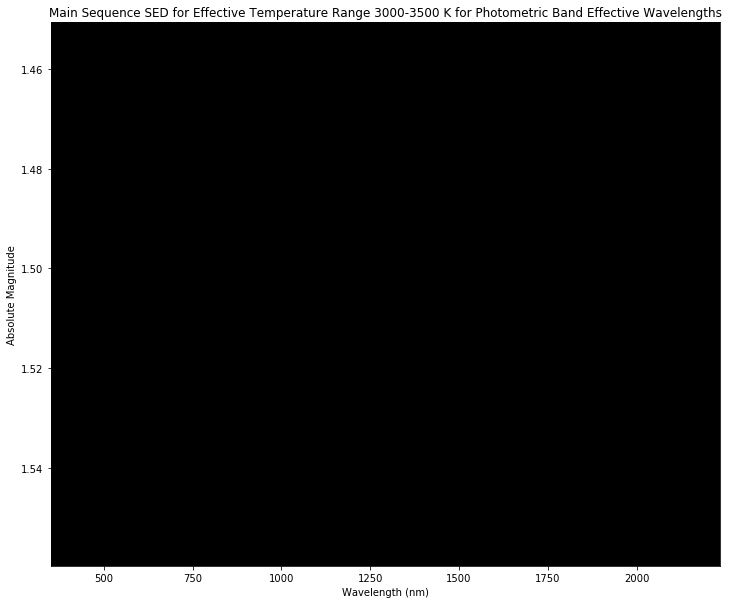

*****Effective Temperature 3500-4000 K*****
The number of main sequence stars in the effective temperature range 3500-4000 K is:  13
The mean temperature in this effective temperature range is:  3800.0
The minimum effective temperature of a main sequence star in this range is:  3580
The maximum effective temperature of a main sequence star in this range is:  4000
The standard deviation of the effective temperatures of main sequence stars in this range is:  114.219761189


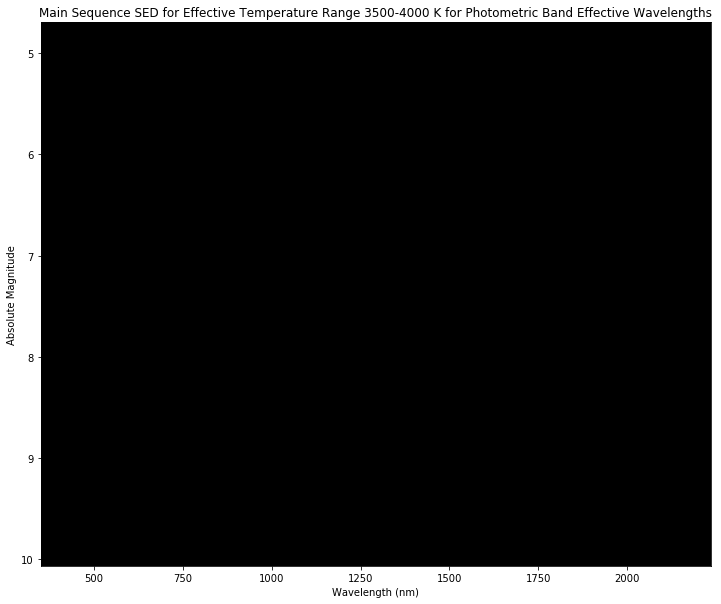

*****Effective Temperature 4000-4500 K*****
The number of main sequence stars in the effective temperature range 4000-4500 K is:  89
The mean temperature in this effective temperature range is:  4268.20224719
The minimum effective temperature of a main sequence star in this range is:  4000
The maximum effective temperature of a main sequence star in this range is:  4420
The standard deviation of the effective temperatures of main sequence stars in this range is:  143.092347001


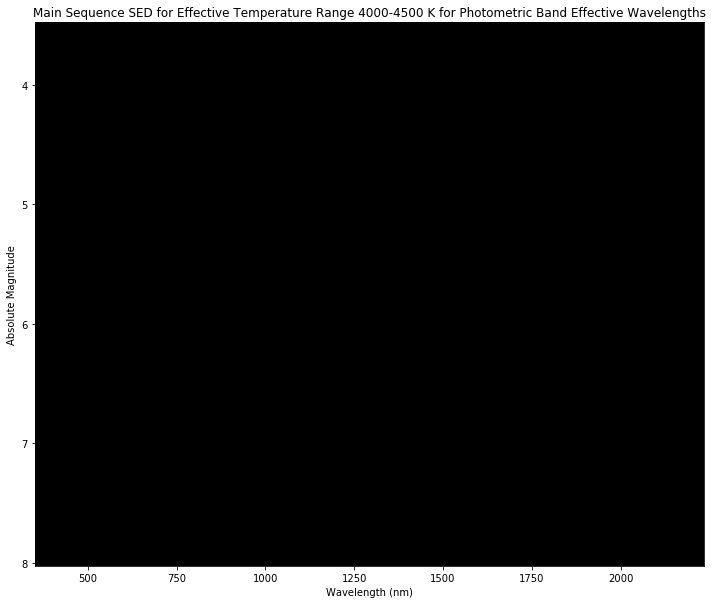

*****Effective Temperature 4500-5000 K*****
The number of main sequence stars in the effective temperature range 4500-5000 K is:  295
The mean temperature in this effective temperature range is:  4781.52542373
The minimum effective temperature of a main sequence star in this range is:  4590
The maximum effective temperature of a main sequence star in this range is:  4900
The standard deviation of the effective temperatures of main sequence stars in this range is:  113.770711422


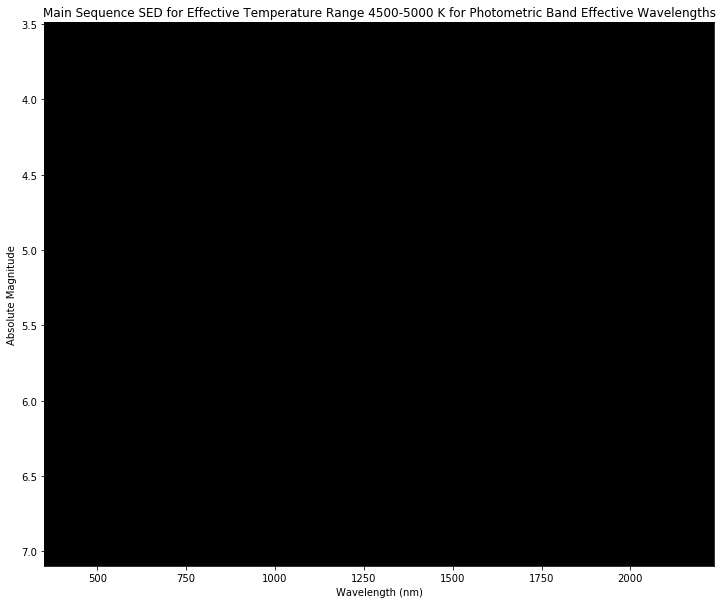

*****Effective Temperature 5000-5500 K*****
The number of main sequence stars in the effective temperature range 5000-5500 K is:  452
The mean temperature in this effective temperature range is:  5191.28318584
The minimum effective temperature of a main sequence star in this range is:  5080
The maximum effective temperature of a main sequence star in this range is:  5450
The standard deviation of the effective temperatures of main sequence stars in this range is:  81.8002065283


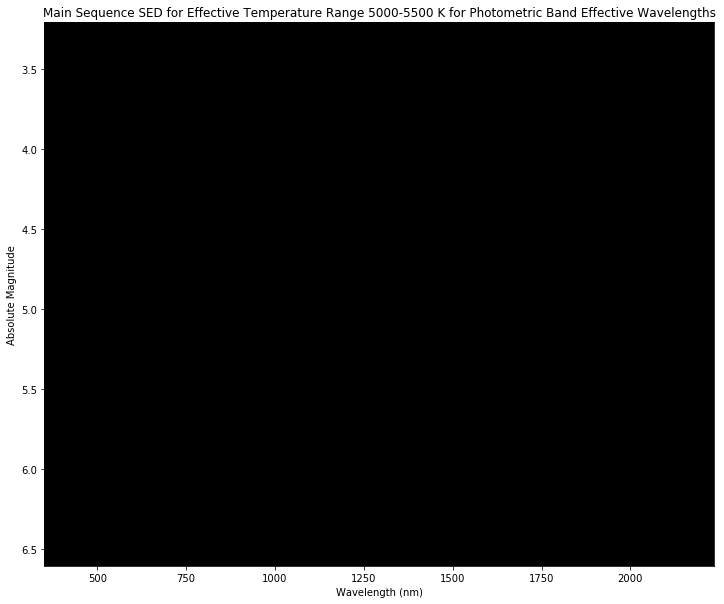

*****Effective Temperature 5500-6000 K*****
The number of main sequence stars in the effective temperature range 5500-6000 K is:  4522
The mean temperature in this effective temperature range is:  5788.25077399
The minimum effective temperature of a main sequence star in this range is:  5570
The maximum effective temperature of a main sequence star in this range is:  5860
The standard deviation of the effective temperatures of main sequence stars in this range is:  96.304406006


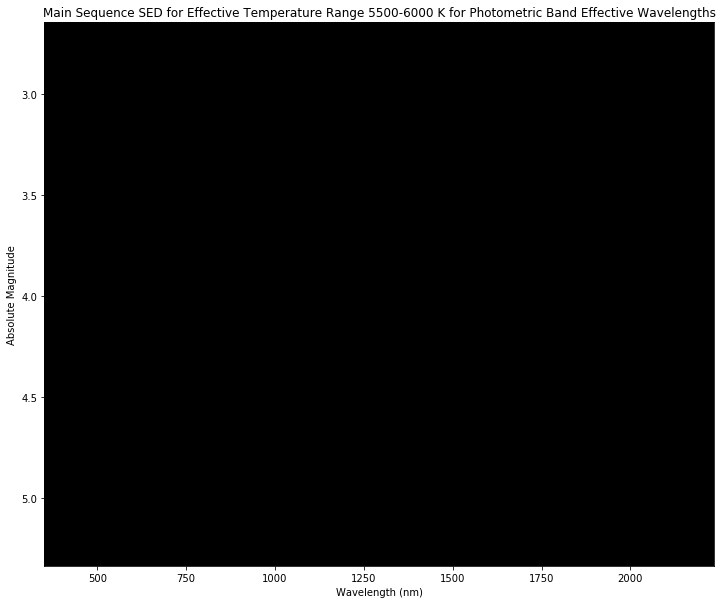

*****Effective Temperature 6000-6500 K*****
The number of main sequence stars in the effective temperature range 6000-6500 K is:  8401
The mean temperature in this effective temperature range is:  6316.11474824
The minimum effective temperature of a main sequence star in this range is:  6030
The maximum effective temperature of a main sequence star in this range is:  6470
The standard deviation of the effective temperatures of main sequence stars in this range is:  174.840272774


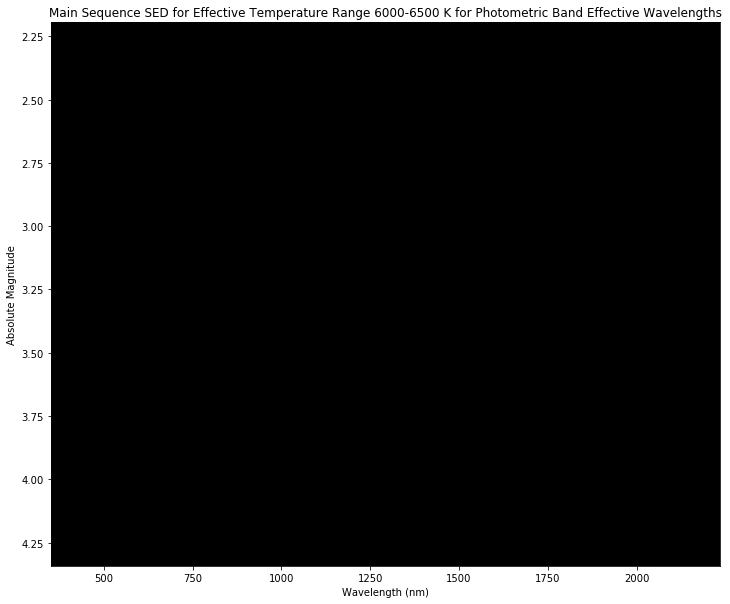

*****Effective Temperature 6500-7000 K*****
The number of main sequence stars in the effective temperature range 6500-7000 K is:  3059
The mean temperature in this effective temperature range is:  6889.92808107
The minimum effective temperature of a main sequence star in this range is:  6870
The maximum effective temperature of a main sequence star in this range is:  6890
The standard deviation of the effective temperatures of main sequence stars in this range is:  1.19716591286


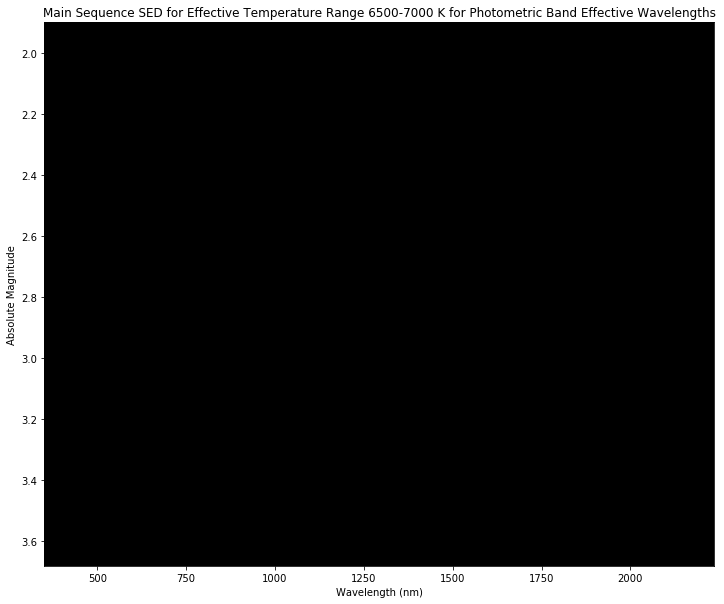

*****Effective Temperature 7000-7500 K*****
The number of main sequence stars in the effective temperature range 7000-7500 K is:  897
The mean temperature in this effective temperature range is:  7201.1148272
The minimum effective temperature of a main sequence star in this range is:  7150
The maximum effective temperature of a main sequence star in this range is:  7450
The standard deviation of the effective temperatures of main sequence stars in this range is:  19.0019999182


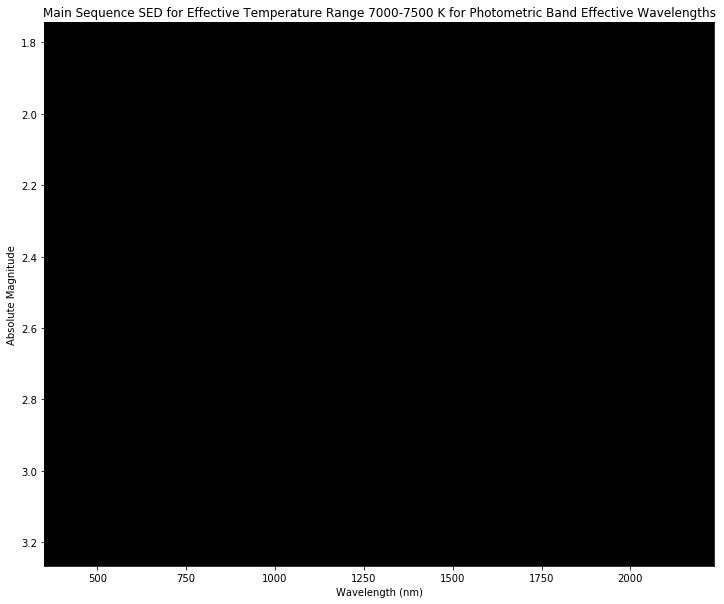

*****Effective Temperature 7500-8000 K*****
The number of main sequence stars in the effective temperature range 7500-8000 K is:  627
The mean temperature in this effective temperature range is:  7847.76714514
The minimum effective temperature of a main sequence star in this range is:  7650
The maximum effective temperature of a main sequence star in this range is:  7850
The standard deviation of the effective temperatures of main sequence stars in this range is:  21.0139318558


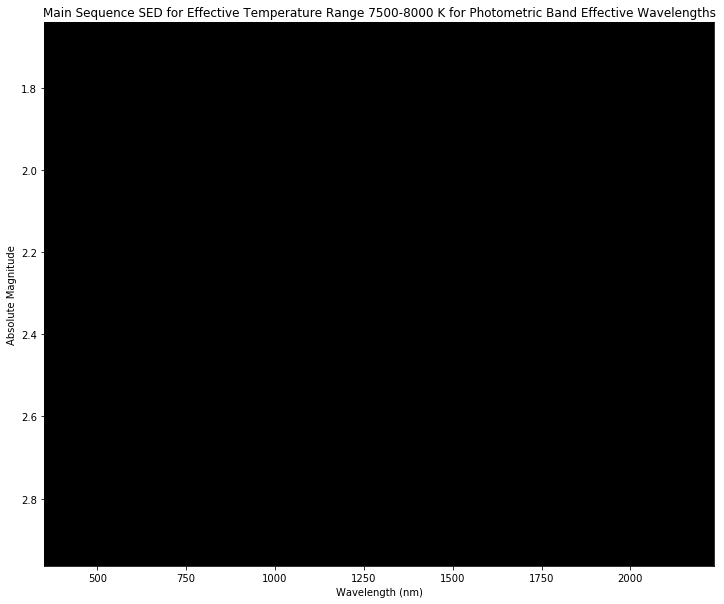

*****Effective Temperature 8000-8500 K*****
The number of main sequence stars in the effective temperature range 8000-8500 K is:  194
The mean temperature in this effective temperature range is:  8194.32989691
The minimum effective temperature of a main sequence star in this range is:  8100
The maximum effective temperature of a main sequence star in this range is:  8200
The standard deviation of the effective temperatures of main sequence stars in this range is:  23.1270456435


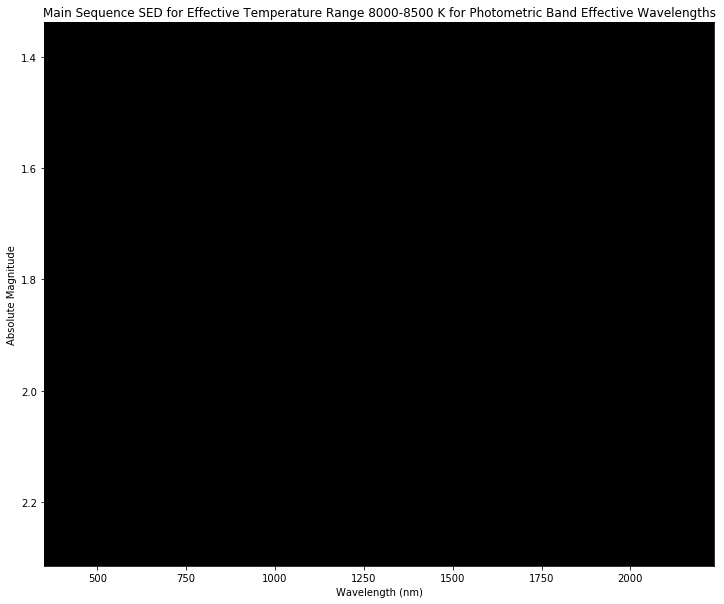

*****Effective Temperature 8500-9000 K*****
The number of main sequence stars in the effective temperature range 8500-9000 K is:  551
The mean temperature in this effective temperature range is:  8819.50998185
The minimum effective temperature of a main sequence star in this range is:  8600
The maximum effective temperature of a main sequence star in this range is:  9000
The standard deviation of the effective temperatures of main sequence stars in this range is:  128.63775794


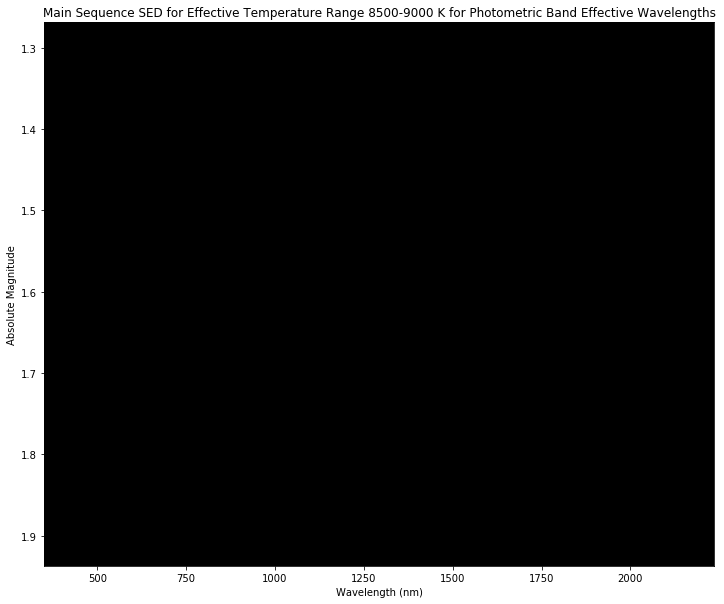

*****Effective Temperature 9000-9500 K*****
The number of main sequence stars in the effective temperature range 9000-9500 K is:  274
The mean temperature in this effective temperature range is:  9224.19708029
The minimum effective temperature of a main sequence star in this range is:  9000
The maximum effective temperature of a main sequence star in this range is:  9480
The standard deviation of the effective temperatures of main sequence stars in this range is:  41.7007657015


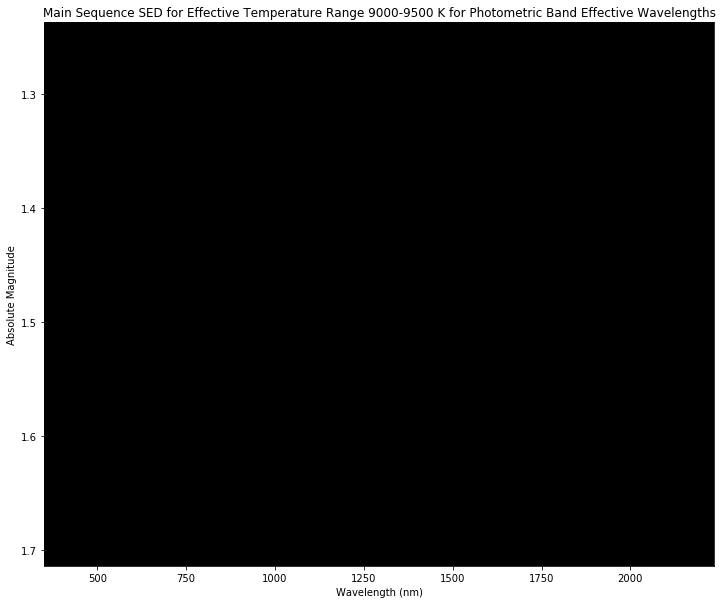

*****Effective Temperature 9500-10000 K*****
The number of main sequence stars in the effective temperature range 9500-10000 K is:  346
The mean temperature in this effective temperature range is:  9520.0
The minimum effective temperature of a main sequence star in this range is:  9520
The maximum effective temperature of a main sequence star in this range is:  9520
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


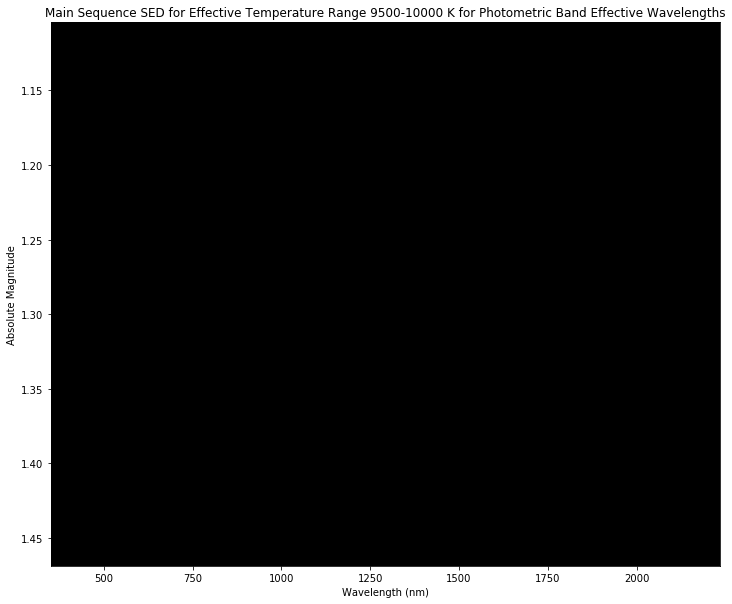

*****Effective Temperature 10000-10500 K*****
The number of main sequence stars in the effective temperature range 10000-10500 K is:  178
The mean temperature in this effective temperature range is:  10500.0
The minimum effective temperature of a main sequence star in this range is:  10500
The maximum effective temperature of a main sequence star in this range is:  10500
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


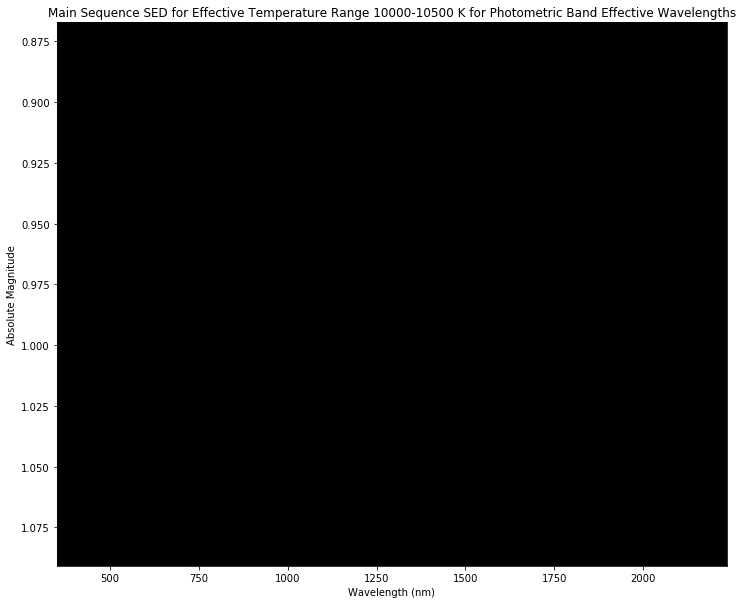

*****Effective Temperature 10500-11000 K*****
The number of main sequence stars in the effective temperature range 10500-11000 K is:  181
The mean temperature in this effective temperature range is:  10508.2872928
The minimum effective temperature of a main sequence star in this range is:  10500
The maximum effective temperature of a main sequence star in this range is:  11000
The standard deviation of the effective temperatures of main sequence stars in this range is:  63.8354696591


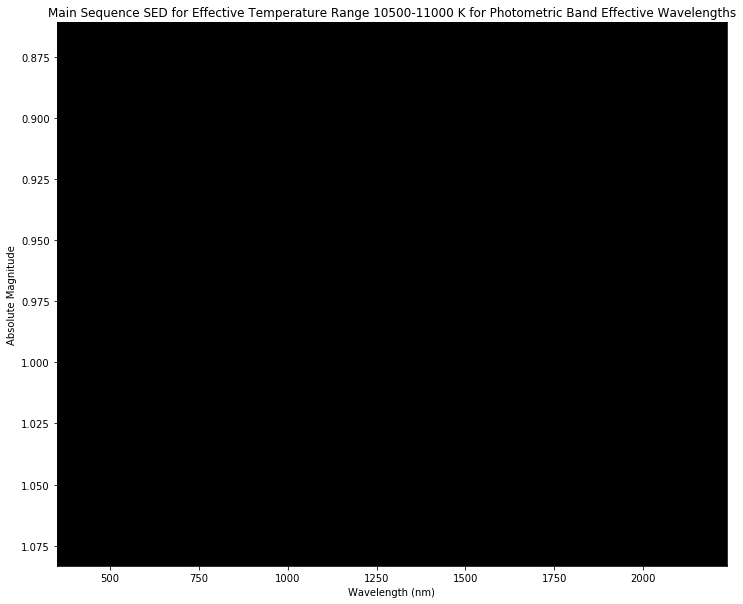

*****Effective Temperature 11000-11500 K*****
The number of main sequence stars in the effective temperature range 11000-11500 K is:  3
The mean temperature in this effective temperature range is:  11000.0
The minimum effective temperature of a main sequence star in this range is:  11000
The maximum effective temperature of a main sequence star in this range is:  11000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


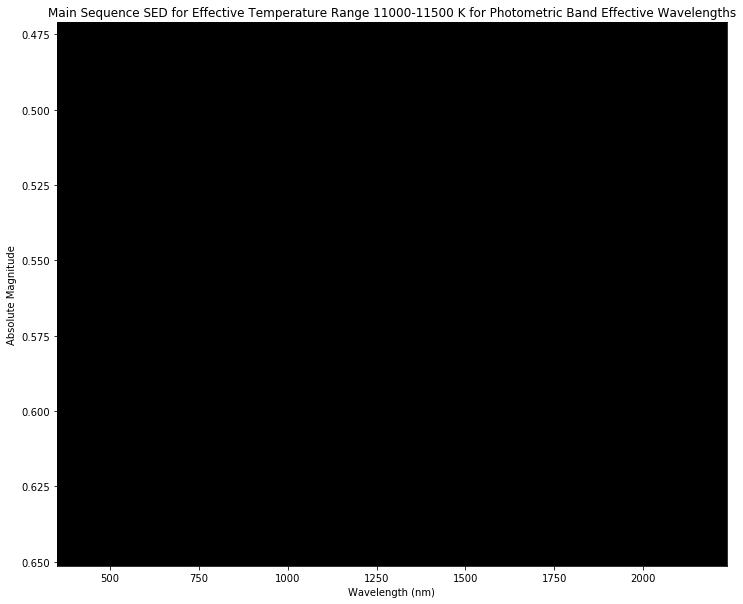

*****Effective Temperature 11500-12000 K*****
The number of main sequence stars in the effective temperature range 11500-12000 K is:  40
The mean temperature in this effective temperature range is:  11900.0
The minimum effective temperature of a main sequence star in this range is:  11900
The maximum effective temperature of a main sequence star in this range is:  11900
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


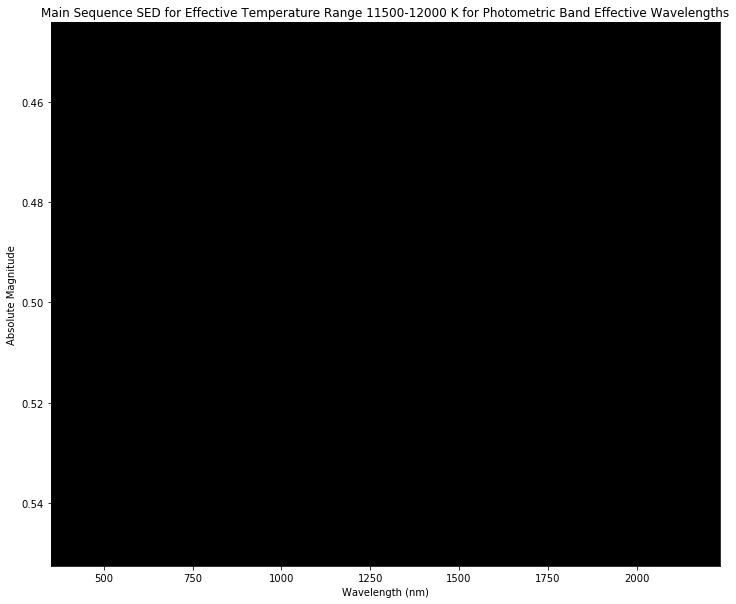

*****Effective Temperature 12000-12500 K*****
The number of main sequence stars in the effective temperature range 12000-12500 K is:  1
The mean temperature in this effective temperature range is:  12400.0
The minimum effective temperature of a main sequence star in this range is:  12400
The maximum effective temperature of a main sequence star in this range is:  12400
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


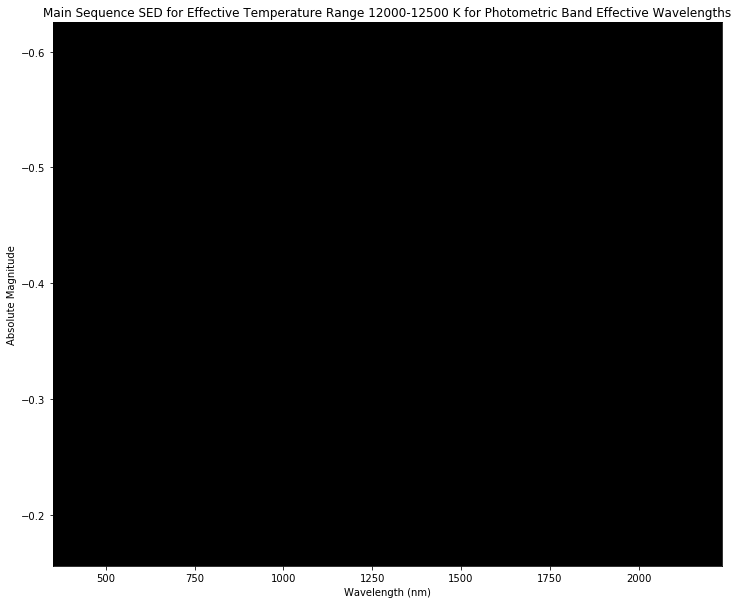

*****Effective Temperature 12500-13000 K*****
The number of main sequence stars in the effective temperature range 12500-13000 K is:  13
The mean temperature in this effective temperature range is:  13000.0
The minimum effective temperature of a main sequence star in this range is:  13000
The maximum effective temperature of a main sequence star in this range is:  13000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


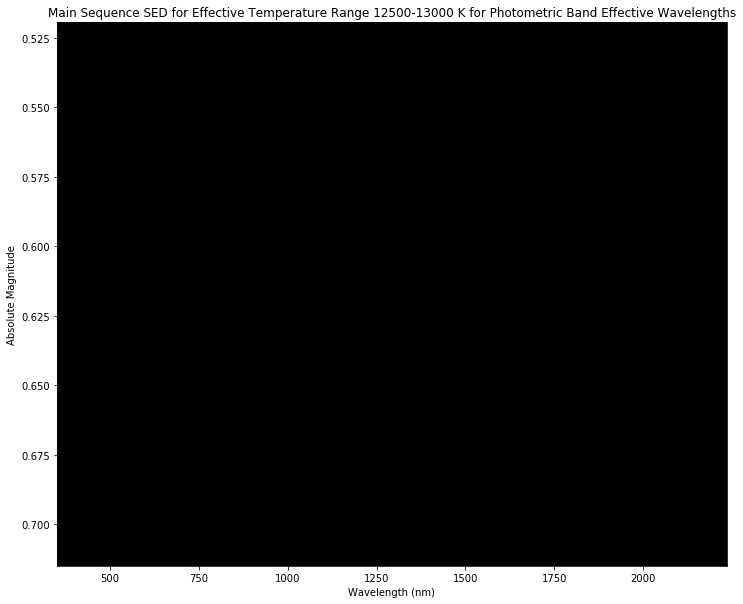

*****Effective Temperature 13000-13500 K*****
The number of main sequence stars in the effective temperature range 13000-13500 K is:  13
The mean temperature in this effective temperature range is:  13000.0
The minimum effective temperature of a main sequence star in this range is:  13000
The maximum effective temperature of a main sequence star in this range is:  13000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


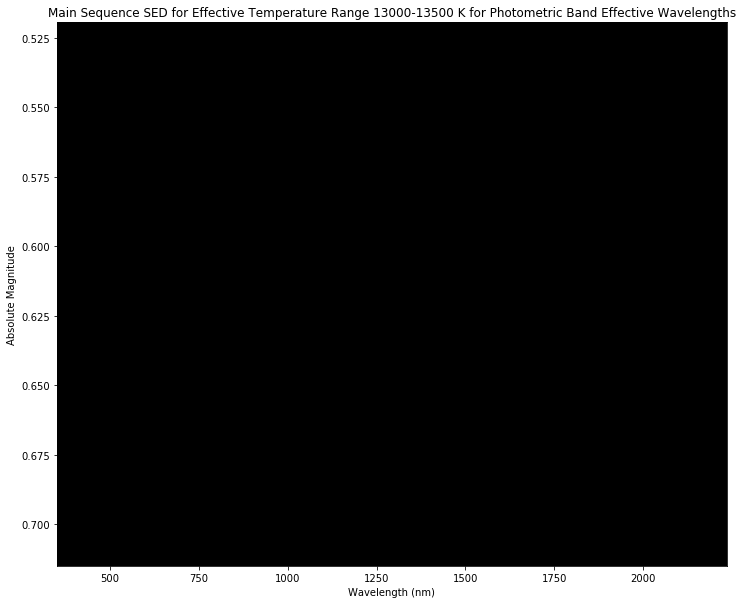

*****Effective Temperature 13500-14000 K*****
The number of main sequence stars in the effective temperature range 13500-14000 K is:  4
The mean temperature in this effective temperature range is:  14000.0
The minimum effective temperature of a main sequence star in this range is:  14000
The maximum effective temperature of a main sequence star in this range is:  14000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


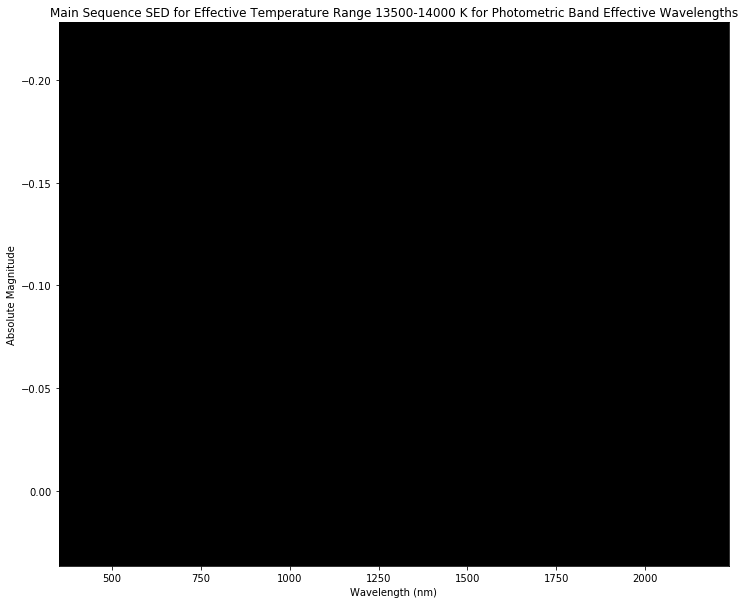

*****Effective Temperature 14000-14500 K*****
The number of main sequence stars in the effective temperature range 14000-14500 K is:  4
The mean temperature in this effective temperature range is:  14000.0
The minimum effective temperature of a main sequence star in this range is:  14000
The maximum effective temperature of a main sequence star in this range is:  14000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


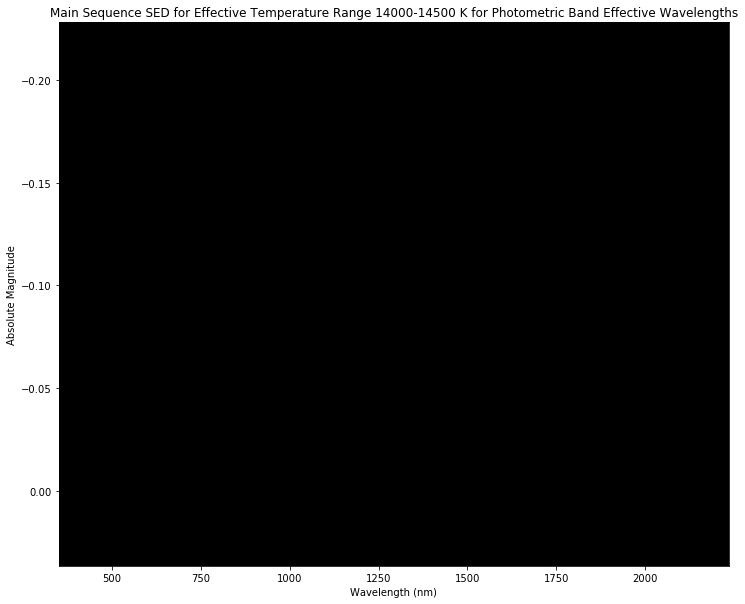

In [80]:
LowTemperatures=[3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000,12500,13000,13500,14000]
AverageTemperatures=[]
MinimumTemperatures=[]
MaximumTemperatures=[]
TemperatureStandardDeviations=[]
AbsFilterMagnitudesMatrix=numpy.zeros((len(LowTemperatures),6))
for i in LowTemperatures:
    print('*****Effective Temperature %g-%g K*****'%(i,i+500))
    TeffMask=numpy.ma.masked_outside(MainSequenceTeff,i,i+500)
    Teffplt=numpy.ma.compressed(TeffMask)
    n=TeffMask.count()
    print('The number of main sequence stars in the effective temperature range %g-%g K is: '%(i,i+500),n)
    MeanTemperature=sum(Teffplt)/n
    print('The mean temperature in this effective temperature range is: ',MeanTemperature)
    AverageTemperatures.append(MeanTemperature)
    MinimumTemperature=min(Teffplt)
    print('The minimum effective temperature of a main sequence star in this range is: ',MinimumTemperature)
    MinimumTemperatures.append(MinimumTemperature)
    MaximumTemperature=max(Teffplt)
    print('The maximum effective temperature of a main sequence star in this range is: ',MaximumTemperature)
    MaximumTemperatures.append(MaximumTemperature)
    TemperatureStandardDeviation=numpy.std(TeffMask)
    print('The standard deviation of the effective temperatures of main sequence stars in this range is: ',TemperatureStandardDeviation)
    TemperatureStandardDeviations.append(TemperatureStandardDeviation)    
    JMask=numpy.ma.array(MainSequenceJabsmag,mask=TeffMask.mask)
    Jplt=numpy.ma.compressed(JMask)
    Jplt=Jplt[~numpy.isnan(Jplt)]
    MeanMainSequenceJplt=numpy.average(Jplt)
    HMask=numpy.ma.array(MainSequenceHabsmag,mask=TeffMask.mask)
    Hplt=numpy.ma.compressed(HMask)
    Hplt=Hplt[~numpy.isnan(Hplt)]
    MeanMainSequenceHplt=numpy.average(Hplt)
    KMask=numpy.ma.array(MainSequenceKabsmag,mask=TeffMask.mask)
    Kplt=numpy.ma.compressed(KMask)
    Kplt=Kplt[~numpy.isnan(Kplt)]
    MeanMainSequenceKplt=numpy.average(Kplt)
    GMask=numpy.ma.array(MainSequenceGabsmag,mask=TeffMask.mask)
    Gplt=numpy.ma.compressed(GMask)
    Gplt=Gplt[~numpy.isnan(Gplt)]
    MeanMainSequenceGplt=numpy.average(Gplt)
    VMask=numpy.ma.array(MainSequenceVabsmag,mask=TeffMask.mask)
    Vplt=numpy.ma.compressed(VMask)
    Vplt=Vplt[~numpy.isnan(Vplt)]
    MeanMainSequenceVplt=numpy.average(Vplt)
    BMask=numpy.ma.array(MainSequenceBabsmag,mask=TeffMask.mask)
    Bplt=numpy.ma.compressed(BMask)
    Bplt=Bplt[~numpy.isnan(Bplt)]
    MeanMainSequenceBplt=numpy.average(Bplt)
    FilterAbsMag=[MeanMainSequenceBplt,MeanMainSequenceVplt,MeanMainSequenceGplt,MeanMainSequenceJplt,MeanMainSequenceHplt,MeanMainSequenceKplt] 
    RowNumber=(i-3000)/500
    j=int(RowNumber)
    AbsFilterMagnitudesMatrix[j, : ]=FilterAbsMag
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Absolute Magnitude')
    plt.title('Main Sequence SED for Effective Temperature Range %g-%g K for Photometric Band Effective Wavelengths'%(i,i+500))
    plt.plot(EffWavelengths,FilterAbsMag,'ko',ms=5)
    plt.gca().invert_yaxis()
    plt.show()

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Warning: converting a masked element to nan.
  # This is added back by InteractiveShellApp.init_path()
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Warning: converting a masked element to nan.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Warning: converting a masked element to nan.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Warning: converting a masked element to nan.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Warning: converting a masked element to nan.


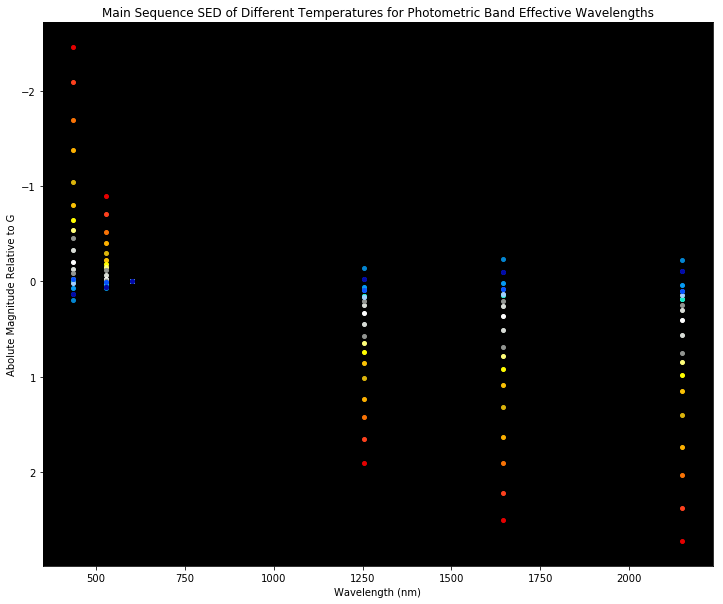

In [39]:
LowTemperatures=[3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000,12500,13000,13500,14000]
AverageTemperatures=[]
MinimumTemperatures=[]
MaximumTemperatures=[]
TemperatureStandardDeviations=[]
for i in LowTemperatures:
    TeffMask=numpy.ma.masked_outside(MainSequenceTeff,i,i+500)
    Teffplt=numpy.ma.compressed(TeffMask)
    n=TeffMask.count()
    MeanTemperature=sum(Teffplt)/n
    MainSequenceG_Jabsmag=numpy.subtract(MainSequenceGabsmag,MainSequenceJabsmag)
    G_JMask=numpy.ma.array(MainSequenceG_Jabsmag,mask=TeffMask.mask)
    G_Jplt=numpy.ma.compressed(G_JMask)
    G_Jplt=G_Jplt[~numpy.isnan(G_Jplt)]
    MeanMainSequenceG_Jplt=numpy.average(G_Jplt)
    MainSequenceG_Habsmag=numpy.subtract(MainSequenceGabsmag,MainSequenceHabsmag)
    G_HMask=numpy.ma.array(MainSequenceG_Habsmag,mask=TeffMask.mask)
    G_Hplt=numpy.ma.compressed(G_HMask)
    G_Hplt=G_Hplt[~numpy.isnan(G_Hplt)]
    MeanMainSequenceG_Hplt=numpy.average(G_Hplt)
    MainSequenceG_Kabsmag=numpy.subtract(MainSequenceGabsmag,MainSequenceKabsmag)
    G_KMask=numpy.ma.array(MainSequenceG_Kabsmag,mask=TeffMask.mask)
    G_Kplt=numpy.ma.compressed(G_KMask)
    G_Kplt=G_Kplt[~numpy.isnan(G_Kplt)]
    MeanMainSequenceG_Kplt=numpy.average(G_Kplt)
    MainSequenceG_Gabsmag=numpy.subtract(MainSequenceGabsmag,MainSequenceGabsmag)
    G_GMask=numpy.ma.array(MainSequenceG_Gabsmag,mask=TeffMask.mask)
    G_Gplt=numpy.ma.compressed(G_GMask)
    G_Gplt=G_Gplt[~numpy.isnan(G_Gplt)]
    MeanMainSequenceG_Gplt=numpy.average(G_Gplt)
    MainSequenceG_Vabsmag=numpy.subtract(MainSequenceGabsmag,MainSequenceVabsmag)
    G_VMask=numpy.ma.array(MainSequenceG_Vabsmag,mask=TeffMask.mask)
    G_Vplt=numpy.ma.compressed(G_VMask)
    G_Vplt=G_Vplt[~numpy.isnan(G_Vplt)]
    MeanMainSequenceG_Vplt=numpy.average(G_Vplt)
    MainSequenceG_Babsmag=numpy.subtract(MainSequenceGabsmag,MainSequenceBabsmag)
    G_BMask=numpy.ma.array(MainSequenceG_Babsmag,mask=TeffMask.mask)
    G_Bplt=numpy.ma.compressed(G_BMask)
    G_Bplt=G_Bplt[~numpy.isnan(G_Bplt)]
    MeanMainSequenceG_Bplt=numpy.average(G_Bplt)
    GSubtractionAbsMag=[MeanMainSequenceG_Bplt,MeanMainSequenceG_Vplt,MeanMainSequenceG_Gplt,MeanMainSequenceG_Jplt,MeanMainSequenceG_Hplt,MeanMainSequenceG_Kplt]
    plt.rcParams['axes.facecolor']='black'
    plt.rcParams['figure.figsize']=12,10
    #if i==3000:
        #plt.plot(EffWavelengths,FilterAbsMag,'xkcd:blood',ms=5)    
    if i==3500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:red',linestyle='None',marker='.',markersize=8)
    elif i==4000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:orange red',linestyle='None',marker='.',markersize=8)
    elif i==4500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:orange',linestyle='None',marker='.',markersize=8)
    elif i==5000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:yellow orange',linestyle='None',marker='.',markersize=8)
    elif i==5500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:gold',linestyle='None',marker='.',markersize=8)
    elif i==6000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:goldenrod',linestyle='None',marker='.',markersize=8)
    elif i==6500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:bright yellow',linestyle='None',marker='.',markersize=8)
    elif i==7000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:light yellow',linestyle='None',marker='.',markersize=8)
    elif i==7500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:grey',linestyle='None',marker='.',markersize=8)
    elif i==8000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:light grey',linestyle='None',marker='.',markersize=8)
    elif i==8500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:white',linestyle='None',marker='.',markersize=8)
    elif i==9000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:light grey',linestyle='None',marker='.',markersize=8)
    elif i==9500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:grey',linestyle='None',marker='.',markersize=8)
    elif i==10000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:pale cyan',linestyle='None',marker='.',markersize=8)
    elif i==10500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:aqua',linestyle='None',marker='.',markersize=8)
    elif i==11000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:baby blue',linestyle='None',marker='.',markersize=8)
    elif i==11500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:azure',linestyle='None',marker='.',markersize=8)
    elif i==12000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:cerulean',linestyle='None',marker='.',markersize=8)
    elif i==12500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:dusty blue',linestyle='None',marker='.',markersize=8)
    elif i==13000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:electric blue',linestyle='None',marker='.',markersize=8)
    elif i==13500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:blue',linestyle='None',marker='.',markersize=8)
    elif i==14000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:cobalt blue',linestyle='None',marker='.',markersize=8)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Abolute Magnitude Relative to G')
plt.title('Main Sequence SED of Different Temperatures for Photometric Band Effective Wavelengths')
plt.gca().invert_yaxis()
plt.show()

In [76]:
Uncertainty=0.1
LowTemperatures=[3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000,12500,13000,13500,14000]
BmV=numpy.subtract(MainSequenceBabsmag,MainSequenceVabsmag)
BmG=numpy.subtract(MainSequenceBabsmag,MainSequenceGabsmag)
VmG=numpy.subtract(MainSequenceVabsmag,MainSequenceGabsmag)
JmG=numpy.subtract(MainSequenceJabsmag,MainSequenceGabsmag)
HmG=numpy.subtract(MainSequenceHabsmag,MainSequenceGabsmag)
KmG=numpy.subtract(MainSequenceKabsmag,MainSequenceGabsmag)
Tsed=numpy.zeros((len(LowTemperatures),5))
Tsed_std=numpy.zeros((len(LowTemperatures),5))
Tsed_cnt=numpy.zeros((len(LowTemperatures),5))
Temp_SED=numpy.zeros(len(LowTemperatures))
for i in range(0,len(LowTemperatures)):
    Low=LowTemperatures[i]
    High=Low+500
    Temp_SED[i]=(Low+High)/2
    TeffMask=numpy.ma.masked_outside(MainSequenceTeff,Low,High)
    BmGMask=numpy.ma.array(BmG,mask=TeffMask.mask)
    Tsed[i,0]=numpy.nanmean(BmGMask)
    Tsed_std[i,0]=numpy.nanstd(BmGMask)
    Tsed_cnt[i,0]=TeffMask.count()
    VmGMask=numpy.ma.array(VmG,mask=TeffMask.mask)
    Tsed[i,1]=numpy.nanmean(VmGMask)
    Tsed_std[i,1]=numpy.nanstd(VmGMask)
    Tsed_cnt[i,1]=TeffMask.count()
    JmGMask=numpy.ma.array(JmG,mask=TeffMask.mask)
    Tsed[i,2]=numpy.nanmean(JmGMask)
    Tsed_std[i,2]=numpy.nanstd(JmGMask)
    Tsed_cnt[i,2]=TeffMask.count()
    HmGMask=numpy.ma.array(HmG,mask=TeffMask.mask)
    Tsed[i,3]=numpy.nanmean(HmGMask)
    Tsed_std[i,3]=numpy.nanstd(HmGMask)
    Tsed_cnt[i,3]=TeffMask.count()
    KmGMask=numpy.ma.array(KmG,mask=TeffMask.mask)
    Tsed[i,4]=numpy.nanmean(KmGMask)
    Tsed_std[i,4]=numpy.nanstd(KmGMask)
    Tsed_cnt[i,4]=TeffMask.count()
count=0
TemplateTinf=numpy.array([])
TemplateTeff=numpy.array([])
Test_SED=numpy.ma.masked_array([0.0]*5,mask=False)
print('The following template matching data is organized in the following manner: ')
print('Star Number     Minimized Chi Squared     Inferred Template Temperature     Catalog Listed Effective Temperature')
for i in range(0,len(Source)):
    if Jmag.mask[i]==False:
        if Hmag.mask[i]==False:
            if Kmag.mask[i]==False:
                if TranslatedLuminosityClass[i]>4.9 and TranslatedLuminosityClass[i]<5.05:
                    ChiSquared=numpy.zeros(len(Temp_SED))
                    Test_SED[0]=numpy.ma.masked_array(Babsmag[i]-Gabsmag[i])
                    Test_SED[1]=numpy.ma.masked_array(Vabsmag[i]-Gabsmag[i])
                    Test_SED[2]=numpy.ma.masked_array(Jabsmag[i]-Gabsmag[i])
                    Test_SED[3]=numpy.ma.masked_array(Habsmag[i]-Gabsmag[i])
                    Test_SED[4]=numpy.ma.masked_array(Kabsmag[i]-Gabsmag[i])
                    for j in range(0,len(Temp_SED)):
                        Template=Tsed[j, : ]
                        for k in range(0,4):
                            if Test_SED.mask[k]==False:
                                ChiSquared[j]=ChiSquared[j]+(((Test_SED[k]-Template[k])*(Test_SED[k]-Template[k]))/(0.1*0.1*5))
                    ChiSquared=numpy.asarray(ChiSquared)
                    MinimumChiSquaredIndex=numpy.where(ChiSquared==numpy.nanmin(ChiSquared))
                    y=MinimumChiSquaredIndex[0]
                    z=y[0]
                    TemplateTinf=numpy.append(TemplateTinf,Temp_SED[z])
                    TemplateTeff=numpy.append(TemplateTeff,Teff[i])
                    print(i,ChiSquared[z],TemplateTinf[count],Teff[i])
                    count=count+1
print('There are ',count,' main sequence stars which have been matched with the closest template.')
print('Inferred main sequence stellar temperatures from template matching: ')
print(TemplateTinf)
print('Listed main sequence effective stellar temperatures: ')
print(TemplateTeff)

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Warning: converting a masked element to nan.
  This is separate from the ipykernel package so we can avoid doing imports until
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Warning: converting a masked element to nan.
  after removing the cwd from sys.path.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Warning: converting a masked element to nan.
  """
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Warning: converting a masked element to nan.
  
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Warning: converting a masked element to nan

The following template matching data is organized in the following manner: 
Star Number     Minimized Chi Squared     Inferred Template Temperature     Catalog Listed Effective Temperature
2 0.0542752767593 9750.0 9520
9 0.0247367014531 6250.0 6440
14 0.514778101841 7250.0 6890
20 0.521416429651 5250.0 5250
23 0.259000662384 5750.0 6440
26 0.243863188523 6250.0 6440
28 0.291348250946 6250.0 5860
29 0.408036133597 6250.0 6440
30 0.0365630532018 7250.0 6890
31 0.0511706682282 9750.0 9230
33 0.391742575958 6750.0 6440
37 0.0183646309193 9250.0 8970
39 0.337208287978 6250.0 6440
41 0.0922100063444 12750.0 9520
43 0.36355963082 5750.0 5770
44 0.642550255474 6250.0 5860
49 0.126360613771 5750.0 5770
50 0.0192964029742 10250.0 9230
51 0.22189468241 6750.0 6890
54 0.0683011792229 7250.0 6890
55 0.0834184982081 6750.0 6890
57 0.390291731708 5750.0 5770
58 0.805555663519 6250.0 5860
61 0.0604907024464 6750.0 6890
63 0.437676109986 5750.0 5860
68 0.0813346959502 6750.0 6890
70 0.352902279578 6750

981 0.206325509036 6250.0 6030
984 0.0890107188807 5750.0 5860
985 0.105617120916 6750.0 6440
986 0.282977496019 6750.0 6440
988 0.0129545429997 9250.0 9230
990 0.194322697361 6750.0 6440
997 0.118484648087 6750.0 6440
1006 0.0187213717019 5750.0 5770
1010 84.589853301 6250.0 6440
1012 0.119040825898 6250.0 5770
1016 0.189400565276 6250.0 5860
1021 0.0843154297896 6250.0 6440
1024 0.555389950269 5750.0 5860
1032 0.0866193099059 6750.0 6890
1035 0.073669168601 6750.0 6440
1038 0.276013278484 7250.0 7850
1043 0.221766616179 6250.0 6440
1048 0.135732957769 6250.0 6200
1058 0.0561932710233 5750.0 5860
1059 0.14299096152 6250.0 6440
1060 0.0754567110032 7750.0 7850
1061 0.271454289852 6750.0 6440
1065 0.199115593778 6750.0 6440
1067 3.86087968581 5250.0 5860
1068 0.431430838363 6750.0 6440
1070 0.0414205598689 6250.0 6440
1077 0.221373886223 5750.0 5570
1083 0.41423911991 6750.0 6890
1084 0.0479190400336 6750.0 6440
1088 0.103547338327 6250.0 6440
1092 0.226908243753 5750.0 5770
1095 0.0345

1800 0.116836955927 6750.0 6440
1803 0.0785389200584 6250.0 6440
1806 0.169591733163 7250.0 7200
1807 0.114709703349 6250.0 6440
1808 0.0401692071575 6250.0 6200
1809 0.389546654972 5750.0 5250
1812 0.0303504079323 5750.0 5860
1814 12.7042618637 5250.0 5250
1816 0.014005257076 6250.0 6440
1818 0.0164483866462 6750.0 6890
1819 0.61791359382 5750.0 5570
1824 0.00382919370794 6750.0 6440
1826 0.0565117610775 7250.0 6890
1827 0.191422334955 6250.0 7200
1830 0.222761981912 5750.0 5770
1831 0.201105060435 6750.0 6440
1832 1.15152509701 5250.0 5570
1833 0.404446392195 6750.0 6440
1834 0.185852574522 7250.0 6890
1836 0.681584831857 5750.0 5860
1837 0.126894558812 5250.0 5570
1840 0.124199499019 6250.0 6440
1841 0.102196682525 6250.0 6440
1842 0.508580714282 5750.0 5860
1843 0.0757363571499 6750.0 6890
1846 0.00995292996491 7250.0 6890
1854 0.157885535266 6250.0 6030
1855 0.107145749619 6750.0 6890
1856 0.0900751454212 5750.0 5860
1857 0.112563307808 6250.0 6030
1858 0.0182554945644 6250.0 6200

2604 0.307411835102 6250.0 6440
2607 0.109314323487 6750.0 6440
2610 0.0211999600703 6250.0 6440
2612 0.263374699358 7250.0 6890
2615 0.0638002894716 7250.0 7200
2624 0.325973715138 6250.0 6440
2625 0.242872197074 6250.0 6030
2626 0.0426670718493 6750.0 6890
2627 0.0688403782708 6750.0 6890
2628 0.0918025663026 10250.0 8970
2629 0.155828834612 6250.0 6440
2631 0.148532208624 6250.0 6440
2632 0.113221701022 5750.0 5570
2633 0.465880532788 5750.0 5770
2635 0.0564606545884 7250.0 6890
2636 0.228462771691 6750.0 6890
2639 1.30451363977 5750.0 5770
2641 0.317726910162 6250.0 6440
2643 1.09461258619 4250.0 4900
2644 0.0175108168278 6750.0 6890
2648 0.163906532338 6250.0 7200
2651 0.110242833657 9250.0 8970
2653 0.0318876999268 6250.0 6440
2655 0.0399553036392 7250.0 6890
2656 0.227880984151 6250.0 6890
2660 0.0259734687111 6250.0 6030
2664 0.841615304555 4750.0 4350
2666 0.0113858551686 9750.0 9230
2671 0.263161718867 6250.0 5860
2673 0.455931838259 6250.0 6200
2677 0.41376141343 5750.0 5860

3701 0.0250293457436 6250.0 6440
3703 0.250294736752 5750.0 5770
3705 0.0551356531045 6250.0 6030
3706 0.14832533669 6250.0 6440
3710 0.449115454142 6250.0 5860
3712 0.0240578804724 9750.0 9230
3713 0.142748723121 6250.0 6440
3718 0.0877460656445 9250.0 9230
3719 0.190610983049 6750.0 7200
3720 0.105804595463 6250.0 6030
3722 0.0847098087324 6750.0 7200
3723 0.0781622909151 6750.0 6440
3726 0.230753488122 6250.0 6890
3727 0.320468172336 6250.0 6440
3729 0.420189520187 5750.0 5770
3735 0.997039506255 5750.0 5770
3739 0.0130939943971 6250.0 6440
3740 1.20375938408 5750.0 5860
3741 0.0213752004125 7250.0 7200
3742 0.575762091481 6250.0 5860
3744 0.0150943097832 6250.0 6200
3745 0.286369689506 6750.0 6440
3748 0.0534329707525 7750.0 7850
3749 0.792892140194 6250.0 5860
3753 0.535586933895 4750.0 5080
3756 0.0506020410143 6250.0 6030
3760 0.228590237936 6250.0 6440
3766 0.149204131418 6750.0 6890
3769 0.126110071237 6250.0 6440
3773 0.0626657535602 5750.0 5860
3774 0.900086271379 5750.0 557

4374 1.60781434482 5750.0 5570
4376 0.0875560421531 6250.0 6440
4377 0.5057802007 6250.0 6200
4379 0.766202282818 5750.0 6030
4380 0.104206279045 6250.0 6440
4381 0.261437262742 6750.0 6440
4382 0.0567101499631 7250.0 7200
4384 0.0595147778042 6750.0 6890
4386 0.143127253587 6250.0 6030
4390 0.07853275708 6250.0 6440
4392 0.0545874973737 6250.0 6440
4400 0.199811323494 7250.0 6890
4403 0.156685864236 6250.0 6440
4404 0.0227638686434 6750.0 6890
4405 2.71856345404 4750.0 4900
4409 0.102009159737 6250.0 6200
4413 0.971490699333 5750.0 5570
4415 0.174887896231 7250.0 6890
4420 1.57764432395 6750.0 8720
4424 0.18851666093 6250.0 5860
4427 0.469541413404 6250.0 6890
4433 1.23773599076 5750.0 5080
4437 0.100331488861 6250.0 6440
4438 0.187318173092 6750.0 6890
4444 0.0410035319027 5750.0 5860
4446 0.0928175121098 6250.0 6440
4447 0.146892669838 6750.0 9230
4448 0.0259851028644 6750.0 7200
4451 0.0342429863269 12750.0 10500
4453 0.0348007708725 7250.0 6890
4455 0.204941343648 6250.0 6200
4457

5060 0.142998281553 6750.0 6890
5061 0.210237385606 6750.0 6890
5068 0.0104027248662 6750.0 6890
5070 0.691751259522 5750.0 5860
5076 0.0728020885906 5750.0 5770
5079 0.0611951071429 6250.0 6030
5082 0.250791332618 6250.0 6440
5084 0.0817612831134 10250.0 9520
5090 0.224718326443 5750.0 5860
5092 0.625724070801 6750.0 6440
5094 0.209407957027 8250.0 7850
5096 0.0883322008657 5750.0 5860
5100 0.777483678706 5750.0 5860
5102 0.170362387581 6250.0 6030
5109 0.286458866405 6250.0 6030
5110 0.142793067001 6250.0 5860
5115 0.0175049229938 13750.0 10500
5117 0.0588728835343 5750.0 5770
5119 0.207031497377 7750.0 7850
5120 0.0875149714608 6750.0 6440
5125 0.0137191898175 11750.0 9520
5126 0.171798828588 6750.0 6440
5128 0.676774443647 5750.0 6030
5132 0.0594647840796 7250.0 6890
5133 0.116696933942 6750.0 7200
5135 0.129394915213 7250.0 6890
5144 0.106358575262 6750.0 6890
5152 0.104311719941 6250.0 6200
5154 0.056047024851 6750.0 6890
5155 0.199667111231 7750.0 7850
5156 0.389587463795 7750.0

6192 0.444816474227 5750.0 6030
6195 0.226840111354 6750.0 6890
6197 0.084307096462 6750.0 6890
6198 0.244751425587 6250.0 6030
6201 0.0317723779786 12750.0 10500
6209 0.332465100613 6250.0 6440
6214 0.110642840121 6750.0 6440
6215 0.162081731034 5750.0 5770
6217 0.057233309297 6750.0 6890
6220 0.604811992235 5750.0 5860
6222 0.0589309972279 11750.0 10500
6223 0.213790403702 6750.0 6440
6227 0.236881875011 6250.0 6440
6229 0.131679201149 6250.0 6200
6234 0.0342733578168 6250.0 6440
6236 0.0441711271616 6750.0 6890
6241 0.137848353945 6250.0 5860
6242 0.33034799857 7750.0 7850
6247 0.144788542065 5750.0 5770
6256 0.184741672446 7250.0 6890
6257 0.458265659347 5750.0 6030
6265 0.254303253429 6250.0 6200
6266 0.114982301293 6250.0 6440
6267 0.237156304694 6250.0 6440
6274 0.275687328333 6250.0 6440
6279 0.0756959789052 6250.0 6030
6280 0.0801444736423 6750.0 6890
6286 0.0681487815826 6750.0 6890
6292 0.114899105464 6750.0 6890
6298 0.12200862746 6750.0 6440
6301 0.117275958095 6750.0 6890

7050 0.133355720231 7250.0 6890
7051 0.125525923872 6250.0 6030
7054 0.046528911713 6250.0 6200
7056 0.527653888951 5750.0 6030
7058 0.0643207045245 6750.0 6890
7060 0.0730911038872 7750.0 6890
7063 0.106519680661 7250.0 7200
7070 0.0438999594777 6250.0 6440
7072 0.269893875262 6250.0 6440
7077 0.352075891419 6750.0 6890
7081 0.113843304747 6250.0 5860
7082 0.763478036019 5750.0 5860
7083 0.0385822895818 7250.0 7200
7085 0.479753433357 5750.0 5860
7092 0.179401277351 6250.0 7850
7095 0.224665418795 5250.0 5860
7098 1.2891374555 5750.0 5770
7100 0.00872120581682 9750.0 9520
7101 0.0563744387367 8750.0 8200
7102 0.0595495218581 6750.0 6440
7103 0.0884539250117 9750.0 9230
7105 0.042734950222 6750.0 6470
7107 0.145323573161 6750.0 6890
7108 0.0803516715381 6250.0 6890
7118 0.210911919824 6250.0 6200
7123 0.281505417841 6750.0 6890
7125 0.238053775379 6250.0 6440
7129 0.710482622294 6250.0 6030
7132 0.378042102331 6750.0 6440
7137 0.825338115112 5750.0 5860
7138 0.0431100043988 6250.0 6440

7749 1.71740212097 6250.0 6440
7750 0.0725498190338 6250.0 6440
7751 0.164519407613 6250.0 6030
7752 0.194110365765 6250.0 6200
7753 0.011396062438 7250.0 7200
7756 1.49440816803 5750.0 5770
7757 0.113703899971 8250.0 7850
7759 0.204129107843 6250.0 6440
7764 0.114279361382 5750.0 5860
7772 0.340632893124 6250.0 6440
7774 0.34631656468 5750.0 5770
7777 0.260853008538 5250.0 5570
7782 0.139685031208 7250.0 6890
7784 0.0915742876147 6250.0 6440
7787 0.068161436623 6750.0 6890
7788 0.132632124866 5750.0 5860
7791 0.649796323637 6250.0 6030
7793 0.117027447321 6250.0 6440
7796 0.19826795525 6250.0 6030
7804 0.169175772966 6250.0 6890
7806 0.301884039102 5250.0 5570
7808 0.0790947960507 5750.0 5770
7810 0.0595268338085 5750.0 5860
7813 0.554143426989 6250.0 6890
7814 0.0665498107702 6250.0 6200
7815 0.141804910641 6750.0 6890
7816 0.311138119352 6250.0 5860
7818 0.101932234974 5750.0 5770
7819 0.675445305362 5750.0 5860
7822 0.0723730444211 9250.0 9230
7823 0.476005058252 5750.0 5860
7825 0

8593 0.012009382696 7250.0 7200
8594 0.147909547719 7250.0 6440
8595 0.0574736553246 6750.0 6440
8596 0.558293390451 5750.0 5770
8598 0.048931449519 6250.0 6440
8600 0.0378951746955 7250.0 8200
8603 0.32086090484 6750.0 6890
8605 0.56018225147 6250.0 5860
8606 0.945926826174 5250.0 5770
8607 0.0443375784065 6750.0 6440
8611 0.0747007544439 6250.0 6890
8612 0.0518204979911 7750.0 7200
8614 0.0 3750.0 3720
8617 0.0360025867492 6750.0 6890
8619 0.132949650837 7250.0 6890
8621 0.372743912796 6250.0 6030
8622 0.994037446575 4250.0 4350
8625 0.418595729394 5750.0 5860
8632 0.109492485236 6250.0 6440
8635 0.00552809439093 6250.0 6440
8637 0.328412472233 5750.0 5860
8640 0.0798189656777 6250.0 6030
8644 0.0711338480314 6750.0 6890
8645 0.465298444305 5750.0 5860
8648 0.049510397088 6250.0 6440
8650 0.0366477463128 6250.0 6030
8651 1.09573326542 5250.0 5770
8652 0.097602449431 8250.0 7850
8653 0.105994579082 6750.0 6200
8654 0.147104917461 5750.0 5770
8657 0.155145663439 8250.0 8200
8658 0.0635

9595 0.0127770521433 9750.0 9520
9596 0.638780953634 5750.0 6030
9599 0.295020446755 6750.0 6440
9602 0.161836432053 7250.0 6890
9603 0.0534163462177 5250.0 5570
9605 0.265988119915 6750.0 6440
9606 0.0860585092945 6250.0 6890
9611 0.14788799941 6750.0 6890
9613 0.320776301339 5750.0 5860
9615 0.184915586622 6250.0 6030
9618 0.0508181150495 6750.0 6890
9619 0.0809898359215 6250.0 6200
9620 0.701759770102 4750.0 5250
9621 0.103804320438 5750.0 5860
9622 0.263673444606 5750.0 6030
9623 0.0688784637323 5750.0 5770
9624 0.0604463099584 8750.0 8720
9627 0.434595045653 6250.0 6440
9630 0.20009506125 7750.0 7850
9633 0.85154366084 4750.0 5250
9634 0.63117312454 5750.0 5770
9635 0.104278797953 6250.0 5860
9636 0.281645785114 6750.0 6440
9637 0.348571162301 6750.0 6440
9638 0.0479210554519 6750.0 6890
9640 0.288057177323 6750.0 6890
9641 0.217357423081 6750.0 6890
9643 0.0413753329082 5750.0 5860
9649 0.144007920023 5750.0 5770
9651 0.0385466728332 6250.0 6440
9652 0.582974455795 6250.0 6440
96

10406 0.221761725219 6750.0 6440
10407 0.176725684872 6750.0 6890
10411 0.0202215132867 7250.0 7850
10412 0.197375920047 7250.0 6890
10413 0.674869931486 6250.0 6440
10419 0.210805355902 7750.0 7200
10421 0.311536529722 8250.0 7200
10424 0.228468706098 6250.0 6030
10427 0.199051252379 6250.0 6440
10428 0.479537701903 6250.0 6440
10431 0.0708083116655 5250.0 5570
10433 0.131287416955 5750.0 5770
10439 0.326792699117 6750.0 6440
10440 0.5128239542 6750.0 6440
10442 0.403038544558 5750.0 5770
10444 1.48252846116 5750.0 5570
10447 0.0787898963041 6250.0 6440
10451 0.187144421337 6250.0 6030
10455 0.198378099663 6750.0 6200
10456 0.0437429921469 7750.0 7200
10458 0.133640354891 6750.0 6890
10459 0.100466077714 6250.0 6440
10465 0.123457017976 8750.0 8200
10467 0.164743358008 6750.0 6890
10469 0.448478984774 5750.0 5860
10472 0.0646089781192 6250.0 6440
10478 0.0998468192655 6250.0 6200
10480 0.042652868736 7750.0 7200
10483 0.704542851803 5750.0 6200
10487 0.0896858008063 12750.0 9520
10489

11386 0.106175581211 5750.0 5770
11391 0.102951184503 6250.0 6440
11392 0.323396217945 5750.0 5570
11395 1.15130991504 6750.0 6890
11402 0.327912958905 6750.0 6440
11407 0.010161818321 7250.0 6890
11409 0.148610642059 7750.0 7850
11410 0.081147587235 6250.0 6030
11411 0.631547400292 5250.0 5770
11419 0.264540858092 6750.0 6890
11421 0.962551905822 6250.0 6200
11422 0.250279668478 6750.0 6890
11424 0.0404415899775 6750.0 6890
11426 0.411157297943 6750.0 6440
11427 0.226763986523 6750.0 6890
11430 0.338120855841 6250.0 6440
11434 0.52727733587 6250.0 9520
11437 0.770964441805 5250.0 5250
11439 0.17855354404 6750.0 6440
11440 0.700294149201 6250.0 6440
11441 0.177987204048 6250.0 6440
11442 0.498637737365 5750.0 6440
11443 0.0937012784881 7250.0 6890
11444 0.0496524528701 6250.0 6440
11445 0.00638100274839 8750.0 9520
11447 0.320896576553 8250.0 7850
11448 0.0586313744996 7750.0 7200
11449 0.185226207104 6250.0 6440
11450 0.648791774203 6250.0 5860
11454 0.279911070305 5750.0 6030
11456 0

12285 0.108742295331 6750.0 7200
12287 1.02839886223 5750.0 6440
12290 0.694169066617 6250.0 6440
12291 0.156555782185 7250.0 6890
12292 0.868869279432 5250.0 5570
12294 0.356322843122 6250.0 6440
12297 0.345733169801 5250.0 5570
12299 0.096241269137 6250.0 6200
12302 0.0930555109696 6250.0 6440
12304 1.81791511871 5250.0 6890
12306 0.135489373645 5750.0 5860
12308 1.34258188079 5750.0 5570
12310 0.0506321410508 6250.0 6440
12313 0.123656695863 5250.0 5570
12314 0.376951449897 6750.0 6440
12317 0.189380962167 6250.0 6030
12320 0.30523711282 6250.0 6440
12321 0.0884979600675 7250.0 6890
12322 0.34368141431 5750.0 5860
12323 0.561247524424 5750.0 5770
12324 5.58193412503 5250.0 5860
12327 0.00409240448829 7250.0 6890
12329 0.0463565213701 6750.0 6890
12332 0.102587023087 6250.0 6200
12334 0.0918341492118 7750.0 7200
12335 0.142246155406 6250.0 6030
12336 0.36222213346 6250.0 6890
12337 0.218336203832 7750.0 7850
12341 0.305250539511 6250.0 6030
12347 0.420948678314 5250.0 4900
12348 0.78

13271 0.385084727767 5250.0 5250
13272 0.139016800611 7250.0 7200
13278 0.0577182860288 7250.0 6890
13279 0.345387566152 6750.0 6440
13280 0.220865287507 6250.0 6200
13285 0.0316894360602 6750.0 6890
13286 0.398392243299 5750.0 5860
13289 0.131984835624 6250.0 6440
13291 0.609377153231 5250.0 5570
13294 0.185732267753 6750.0 6890
13298 0.290962664115 6250.0 6030
13300 0.0086838075051 7750.0 7200
13301 0.0859937948528 6250.0 6890
13303 0.440437653642 5750.0 5860
13305 0.464679741513 5750.0 5860
13309 1.43601065157 5750.0 6440
13310 0.0111338018631 6750.0 6440
13313 0.0473829296078 6750.0 6890
13316 0.504652599432 6250.0 6030
13321 0.253481762768 6250.0 6890
13324 0.297701607492 6250.0 6440
13330 0.24040953888 7750.0 7850
13333 0.154539465788 6250.0 6030
13334 0.566901913492 5750.0 6030
13337 0.31914515727 6250.0 6030
13339 0.320627480466 6250.0 6030
13340 0.0907912896187 5750.0 5860
13341 0.128252599203 7250.0 6890
13344 0.00847919345198 7750.0 8200
13346 0.0993067700567 5750.0 5770
133

14432 0.753049935024 6250.0 6030
14434 0.273571785749 6250.0 6200
14436 0.380499567198 6750.0 6440
14437 0.452881304878 5750.0 5770
14438 0.0225621016707 7250.0 7200
14441 0.0891283254782 6750.0 6890
14443 0.689148030576 5750.0 5770
14445 0.0189693544204 6750.0 6890
14450 0.79272905478 5750.0 6030
14454 0.574629797466 4250.0 4900
14459 1.08099684134 5250.0 5770
14460 0.0390418143514 6250.0 6440
14465 0.0971005365806 6250.0 6440
14466 0.0645106848057 6750.0 6890
14468 3.14519669719 5250.0 5770
14470 0.0350980066455 8250.0 7850
14472 0.0633434529389 6750.0 6890
14473 0.140102680366 5750.0 5860
14477 0.0305401026943 6250.0 6440
14478 0.370767324972 6250.0 6440
14480 0.0333421230402 10250.0 9520
14482 0.864512158043 5750.0 5770
14485 0.0990795424172 8750.0 9230
14486 0.0301306585385 6750.0 6890
14487 0.0793172486667 6750.0 6890
14490 0.332428158363 6250.0 6440
14491 0.0801788240998 6750.0 6440
14493 0.505551331431 6250.0 6890
14498 0.545560896144 5750.0 5770
14502 0.0743534672075 6750.0 64

15341 0.482567981481 6250.0 6440
15344 0.192797100298 6250.0 6890
15346 0.311295812656 7250.0 6890
15349 0.613531626861 5750.0 6030
15350 0.401327947918 5750.0 5860
15353 0.466361998224 6250.0 6440
15356 0.965070415661 5250.0 5570
15363 0.0020008633152 5750.0 5770
15374 0.277515470546 5750.0 5770
15376 0.321197219813 6250.0 6030
15377 0.108308026859 6250.0 6890
15384 0.161079102558 6250.0 6440
15385 0.709568424624 5750.0 6200
15394 0.610144773155 5750.0 5770
15395 0.753192309073 5750.0 5860
15404 0.0367285391482 6750.0 7200
15406 0.0490687839762 6250.0 6440
15411 0.124692448806 6250.0 6030
15417 0.0129559670039 7750.0 7200
15418 0.142313965332 6250.0 6440
15419 0.3101838319 6250.0 6440
15420 0.586117656993 5750.0 5860
15423 0.0322148083732 6250.0 6440
15427 0.688788287932 5750.0 5570
15429 0.0991465440218 5250.0 5250
15433 0.213348549129 6750.0 6890
15435 0.698164559189 5750.0 5770
15436 0.07501564651 11750.0 9520
15441 0.0589773434035 7250.0 6890
15442 0.0688745612817 5750.0 5770
1544

16431 0.404660537085 6250.0 6440
16432 0.36578677043 6750.0 6440
16444 0.0825432169348 9250.0 8720
16447 0.0103871235679 9250.0 8970
16459 0.393347177911 8250.0 7850
16462 0.0250196785885 9250.0 8970
16468 0.739880019744 4750.0 4900
16469 0.0613540837541 6750.0 6440
16471 0.0902191809322 6750.0 6890
16478 0.152668073278 6250.0 6440
16479 0.208129435102 6750.0 6890
16481 0.722110755015 5750.0 5770
16484 0.00523527371679 6250.0 6200
16485 0.0610578512988 9250.0 10500
16486 0.252018023152 6750.0 6890
16491 0.184737969136 7250.0 6890
16492 1.09777947314 5250.0 5250
16494 0.319499356367 5750.0 5770
16499 0.0197449064732 6750.0 7200
16504 0.0850972066067 6750.0 6890
16507 0.47963713682 5750.0 5860
16508 0.860810777581 5750.0 6440
16509 0.32237910473 6250.0 6440
16510 0.171441187343 6250.0 6030
16512 0.0617435087871 6750.0 6440
16515 0.547301159535 5750.0 6030
16520 0.628400013597 6250.0 6030
16523 0.0624089163507 6250.0 6440
16526 0.220748006214 6250.0 6440
16533 0.208993489466 5750.0 5860
1

17465 1.43287122462 4250.0 4900
17469 0.240201433613 5750.0 5770
17470 0.115786425585 6250.0 6440
17474 0.0989920710971 6250.0 6200
17479 0.153735221222 7750.0 7850
17481 0.457878297052 6250.0 6440
17482 0.147532337228 6750.0 7200
17484 0.0485891067799 6750.0 6440
17485 0.102148778771 6750.0 6440
17486 0.0295105036862 9250.0 8720
17487 0.144781541959 6250.0 6030
17490 0.237672956294 5750.0 5860
17491 0.020430146448 6250.0 6440
17492 0.159063118113 7750.0 7850
17501 0.0304153212969 4750.0 4590
17503 0.240646201985 6250.0 6030
17505 0.0874885469603 5750.0 5860
17508 0.100524709993 6750.0 6440
17509 0.0482964259469 7750.0 7200
17510 0.247236300803 7750.0 7200
17511 0.0730608019836 7250.0 6890
17512 0.453575509447 5750.0 5860
17513 0.163225070671 7250.0 6870
17514 0.21147467731 6250.0 6890
17517 0.146126220031 6250.0 6440
17519 0.371389895564 5750.0 5860
17520 0.0284504189363 6750.0 6440
17525 0.960246957491 5750.0 6890
17527 0.221534270488 6250.0 6890
17528 0.227100210544 6250.0 5860
1753

18527 0.0821014746549 6250.0 6030
18531 0.00286730537151 7750.0 7850
18532 0.121825142748 6250.0 6200
18534 1.01918740984 4750.0 5570
18535 0.0664504056728 6750.0 6440
18537 0.267641468052 6250.0 6440
18538 0.0298384025693 8250.0 8720
18539 0.282028909028 6250.0 6440
18540 0.110399414154 6750.0 6440
18546 0.960621139406 5250.0 5570
18551 0.00643175443943 6750.0 6890
18552 0.173094596407 5750.0 5770
18553 0.0236646436901 5750.0 5770
18554 0.0723832761204 5750.0 5860
18556 0.0266639665359 6750.0 6440
18559 0.0935205397716 6250.0 6030
18562 0.0936417411786 5750.0 5860
18565 3.32528914886 5250.0 5570
18569 0.00646630519893 7250.0 7200
18570 0.146029012343 6250.0 6200
18574 0.109190516646 7250.0 6890
18577 0.095636109595 13750.0 10500
18581 0.625675726656 5750.0 5860
18582 0.18917777884 6750.0 6890
18583 0.0883801320551 7250.0 6890
18589 0.7516608688 5750.0 5570
18590 0.23201461602 6750.0 6890
18597 0.396745090337 5750.0 6030
18601 0.00325049207767 9750.0 9520
18603 0.221152864538 6250.0 64

19561 0.181847359228 6750.0 6890
19566 0.0408060894832 6250.0 6440
19568 0.313847011691 5750.0 5860
19570 0.569832658399 5750.0 5860
19571 0.129124771961 7250.0 7850
19573 0.526783468597 6250.0 6440
19575 0.587727610094 6250.0 6030
19581 0.173132997369 7250.0 6890
19582 0.0431447563145 6250.0 6440
19583 0.358360768314 6250.0 6030
19588 0.202509627003 6250.0 6440
19596 0.108585329973 6750.0 6440
19597 0.133237701328 7750.0 6890
19598 0.232162381763 5750.0 5770
19599 0.305090490786 6250.0 6890
19600 0.535691031237 5750.0 5570
19606 0.0552029154029 7250.0 6890
19608 0.175409056785 6250.0 6030
19609 0.771400285846 6250.0 6030
19614 0.872208626974 5750.0 5770
19616 0.0323947951684 6750.0 6890
19618 0.824196989836 5750.0 5770
19620 0.0272488427656 6750.0 6890
19624 0.194004443525 6250.0 6030
19627 0.0 3750.0 3850
19628 0.103921826845 8750.0 8970
19629 0.0316420976221 7750.0 7850
19632 0.43933475277 5750.0 5770
19638 0.333078745556 6750.0 6200
19639 0.760035300459 5750.0 5770
19640 0.22375403

20635 0.0924301784838 6750.0 6890
20639 0.134349182252 6750.0 6890
20641 0.35691523342 5750.0 5860
20644 0.468418191394 5750.0 6030
20646 0.247288516531 6250.0 6440
20651 0.496056485181 5750.0 6030
20658 0.307708136765 5750.0 6890
20663 0.764201590078 6250.0 6030
20670 0.0784122079253 6250.0 6440
20671 0.208355862509 5750.0 5860
20673 0.419216132311 5750.0 5860
20675 0.133296929406 5750.0 5770
20676 0.437631688568 6250.0 5770
20681 0.8483092873 5750.0 5860
20689 0.181436559812 6250.0 6440
20691 0.160503403788 6750.0 6440
20700 5.5058000488 5250.0 5770
20705 0.034706695956 6750.0 6890
20708 0.0410188429323 9750.0 9230
20710 0.337619484187 6250.0 7200
20712 0.136462854376 6250.0 6890
20716 0.0194162846255 6250.0 6440
20718 0.109687561478 6250.0 6030
20720 0.018170888293 7250.0 6890
20725 0.140760149931 7250.0 6890
20726 0.396786766442 6250.0 6440
20734 0.14642938668 7250.0 6890
20735 0.0199627253088 6250.0 6440
20736 0.0090348933223 9750.0 10500
20738 0.254493692099 5750.0 6030
20739 0.2

21539 0.114338285212 6750.0 6890
21541 0.761445892086 5750.0 6030
21543 0.323040772364 6750.0 6890
21545 0.134481558344 6250.0 6030
21547 0.192210228522 6750.0 6890
21549 0.0539014662416 6750.0 6890
21553 0.569928914011 5750.0 5770
21556 0.152725535019 6250.0 6440
21557 0.152271798652 6750.0 7200
21560 0.0560894030835 5750.0 5570
21572 0.143001342664 6250.0 6200
21573 0.128206474042 5750.0 5770
21574 0.155903764774 5750.0 5860
21576 1.3012245614 5250.0 5860
21578 0.0461250370673 6250.0 6440
21579 0.0251018926934 9750.0 8970
21580 0.118787680475 8750.0 8200
21581 0.434514166658 3750.0 6440
21582 0.524240805672 5750.0 6030
21583 0.255824636131 5750.0 6030
21592 0.0210494542353 6250.0 6440
21593 0.0420282595682 9250.0 9520
21594 0.13189996679 5750.0 5860
21596 0.734364422292 6250.0 6890
21598 0.037713813129 6750.0 6890
21601 0.304448252303 6250.0 6440
21602 1.45039962712 5250.0 5770
21604 0.141628434757 7250.0 7200
21606 0.1441255722 5750.0 5770
21607 0.147185534557 6750.0 7200
21608 0.25

22658 0.26995771876 6250.0 6440
22659 0.397907094425 6250.0 6030
22662 0.280327513383 5750.0 5860
22663 0.461515749727 6250.0 6030
22664 0.249074458393 6250.0 5770
22665 15.6273822315 6250.0 6440
22668 0.0807359448463 6250.0 6440
22674 0.674584139114 6250.0 5860
22678 0.559282193251 6250.0 5860
22682 0.0139272169036 6750.0 6890
22684 0.353434023639 6750.0 6440
22686 0.197132398497 6250.0 5860
22688 0.323434369025 4750.0 4900
22694 0.724390868546 6250.0 5860
22696 0.538235390452 6250.0 6030
22697 0.668864423605 5750.0 5770
22698 0.318292439206 5750.0 6440
22699 0.283879831443 6250.0 6440
22704 0.5632252308 5750.0 5860
22707 0.0342809019874 6250.0 6440
22713 0.482634959117 5750.0 6440
22716 0.222347252066 6250.0 6440
22719 0.40050457795 6250.0 7850
22725 0.0404616300088 7250.0 7200
22727 0.0242914819369 6750.0 6890
22729 0.413846767912 6250.0 6440
22731 1.33250970035 5250.0 7200
22733 0.494490410901 5750.0 5860
22740 0.0685285555748 6750.0 6440
22743 0.0943526038582 11750.0 9520
22744 0.

23848 0.119366130371 6250.0 6440
23859 0.551064360381 5750.0 5860
23863 0.0876127695578 6750.0 6890
23874 0.0257042854697 9250.0 8720
23875 0.239661515491 5250.0 5570
23878 0.0541992827382 7750.0 7200
23879 0.544198244998 5750.0 5860
23881 0.233348920941 6250.0 6200
23884 0.0349281338455 6750.0 6890
23885 0.0897564116803 6250.0 6440
23887 0.199661276808 6250.0 6440
23895 0.965252121704 6250.0 6030
23896 0.0381179850882 7750.0 7200
23899 0.444840251319 6750.0 6440
23903 0.0342877127808 7750.0 7850
23910 0.0730860348542 7750.0 7200
23912 0.191668927442 6250.0 6030
23916 0.105771458119 6250.0 6030
23917 0.493204075189 5750.0 5770
23919 0.0391445109365 7750.0 7850
23923 2.15243132723 5750.0 5570
23935 0.198814853627 7250.0 6890
23945 0.0251791807088 6250.0 6440
23951 2.42944654838 7750.0 6890
23972 0.417323292463 5250.0 5080
23984 9.54844921441 5250.0 5860
23992 0.55986100851 6250.0 5860
24002 0.104427655315 6750.0 6890
24010 0.400960905675 5250.0 5570
24011 0.480435048126 5750.0 5860
2401

24766 0.00572160572515 8750.0 8970
24767 0.0663096997151 6750.0 6440
24768 0.234534094372 6250.0 6440
24769 8.42827308919 5750.0 6890
24771 0.339639252684 5750.0 5770
24773 0.774825238468 5750.0 6440
24777 0.0694382792235 6750.0 6440
24779 0.331023415086 6250.0 6440
24784 0.516041815612 6250.0 5860
24787 0.353063154519 5750.0 5860
24793 0.285149533204 8250.0 8720
24794 0.0486206735435 7250.0 6890
24796 0.0180150746584 6250.0 6030
24801 0.181936607063 6250.0 6440
24802 0.703123539313 6750.0 6890
24804 0.396124578798 5750.0 5860
24808 0.0932322457549 6750.0 7200
24811 0.0876268297062 6750.0 6890
24812 0.0123504583441 6250.0 6440
24817 0.149106131858 7750.0 7850
24819 0.0721864938761 7250.0 7200
24822 0.0501325306439 6750.0 6440
24825 0.0582465600644 6750.0 6440
24827 0.300078470267 6250.0 6440
24830 0.131586343075 6250.0 6440
24832 0.556054114783 6750.0 6440
24835 0.282570821108 6250.0 6440
24837 0.285059070364 6250.0 7850
24839 0.147282355992 6250.0 6440
24840 0.0792077259199 6250.0 620

25498 0.312727936438 6750.0 6440
25500 0.915021275594 6250.0 6030
25501 0.676567703568 5750.0 5770
25504 0.630959912945 6250.0 6030
25506 0.643732087818 5250.0 5570
25509 0.126090669335 6250.0 6440
25511 1.56475872467 5750.0 5770
25512 0.179809080935 6750.0 6890
25519 0.0727296508488 6750.0 6440
25521 0.0187590027254 7750.0 6890
25523 0.164579432492 5750.0 5770
25525 2.7058046868 5750.0 6200
25527 0.516930730623 6250.0 6030
25528 0.521140573718 5750.0 6030
25529 0.0961437565498 6250.0 6030
25531 0.256478721306 6250.0 6030
25533 0.0409023953512 7750.0 7200
25534 0.125695239857 6750.0 6440
25538 0.70357047819 5750.0 5860
25541 0.408732014329 5750.0 5860
25543 0.0647855478956 5250.0 5080
25546 0.218104515884 4750.0 4900
25559 0.0395005132025 6250.0 6440
25561 0.106860208204 6750.0 6890
25562 0.249561309481 6250.0 6440
25566 0.35450420422 6250.0 6030
25571 0.176396458037 5750.0 5770
25576 0.122204534755 5250.0 5570
25577 0.0273905352906 8750.0 8720
25578 0.0504271601921 6250.0 6440
25580 0

26517 0.455879723628 5750.0 5770
26519 0.267182947978 6750.0 7850
26528 0.142794087124 6250.0 6440
26529 0.192029742427 8250.0 7850
26531 0.0294252536917 6250.0 6440
26532 0.340451078397 5750.0 5770
26534 0.0606963744392 6750.0 6890
26537 0.478693867643 6250.0 5860
26540 0.0842005856434 6750.0 6890
26542 0.100096389288 7250.0 6890
26549 0.565103271702 5250.0 5250
26550 1.15055995885 5750.0 5860
26554 0.495756686196 5750.0 6200
26562 0.305770460293 6250.0 6440
26564 0.0343401611598 10750.0 8970
26565 0.0761764753698 6250.0 6440
26566 0.288615610338 6250.0 6890
26567 0.0242300338208 7250.0 7850
26570 0.866160355973 6250.0 6030
26572 0.191927378899 5750.0 5860
26574 0.179732700546 5750.0 6030
26579 0.0632443163085 5750.0 5860
26580 0.098298506445 6750.0 6440
26583 0.219598509422 6750.0 6440
26584 0.0874975623663 11750.0 9520
26587 0.0407774823995 9250.0 8720
26589 1.84538248905 5250.0 5250
26595 0.0641471861215 6750.0 8200
26602 0.0426633932285 6250.0 6200
26603 0.123250592807 6250.0 6440

27424 0.146187433195 6250.0 6440
27427 0.252273865827 8250.0 9520
27429 0.251888195481 5750.0 5860
27431 0.0347220997715 12750.0 9520
27434 0.0488458973622 6250.0 6440
27437 0.298927230773 6750.0 6440
27440 0.274664582469 6250.0 6440
27444 0.0792241686465 6250.0 6440
27446 0.442878038603 5750.0 5770
27454 0.065524371848 7750.0 7850
27455 0.0861866758575 6750.0 6890
27459 0.0818967550028 8250.0 8200
27460 0.0826427614971 6750.0 6890
27465 0.255202331577 5750.0 5860
27469 0.0866505355172 9750.0 8970
27471 0.0521760306047 6250.0 6440
27473 0.0447503761619 6750.0 6440
27475 0.160431342754 5750.0 6030
27479 0.120995461555 7250.0 6890
27480 0.201275498949 6750.0 6440
27484 0.170856539627 7250.0 9230
27486 0.411654423759 6250.0 6440
27487 0.0538886571498 6250.0 6200
27488 0.22061944101 6250.0 6440
27491 0.162559594546 6250.0 6440
27493 0.318384274107 8250.0 7850
27501 0.0621694035965 12750.0 18700
27504 9.42556277589 5250.0 6030
27511 0.80459026967 5750.0 6440
27513 0.179108290523 5750.0 6030

28476 0.532343507161 5750.0 5860
28481 0.226060511085 6250.0 7200
28483 0.0579392708677 8750.0 9230
28485 0.0694798406042 6750.0 6440
28486 0.457688064773 5750.0 5860
28487 0.0121444549488 10750.0 10500
28488 0.440808285855 6750.0 6890
28489 0.0397149126898 6250.0 6440
28490 0.14779926514 6750.0 7850
28495 0.721078390712 5750.0 6440
28499 0.0725332062865 6250.0 6890
28500 0.114911471821 6250.0 6440
28505 0.328251200081 6250.0 6440
28506 0.500490232802 6250.0 6030
28508 0.208556711888 6750.0 6890
28514 0.553593833789 6250.0 6440
28515 0.496859296685 5250.0 5570
28516 0.143672228894 6250.0 6440
28520 0.0887741370359 7750.0 7200
28524 0.191337270443 6250.0 6440
28528 0.0123816547555 6750.0 6890
28532 0.157574735606 6750.0 6440
28536 0.319754936453 6750.0 6440
28538 0.0409201120093 6250.0 6440
28539 0.0590707299906 7750.0 7200
28540 0.110844144104 5750.0 5860
28545 0.0257253967394 6750.0 6440
28546 0.0468307912011 7750.0 7200
28549 0.05404807219 6250.0 6440
28554 0.00740200344387 7250.0 68

29496 0.188433998932 6250.0 6030
29498 0.0245457603878 6250.0 6200
29499 0.113278855251 6250.0 6440
29501 0.253238909312 5750.0 6030
29503 0.106064766748 9250.0 8720
29505 0.0361920788287 9250.0 8970
29507 0.389412533491 5750.0 5770
29509 0.254258212104 6250.0 6440
29512 0.150813620318 6250.0 6030
29516 0.304837686509 5750.0 5860
29525 0.0837258741947 5750.0 5770
29527 0.0502048770861 6750.0 6890
29529 0.234391483853 5750.0 5770
29531 7.12984015126 5250.0 6440
29533 0.0364973280189 6750.0 6890
29537 0.10478589878 6250.0 6440
29538 0.128810647068 10250.0 9520
29539 0.529341247507 5750.0 5860
29542 0.018268259701 7250.0 7850
29543 1.10400836332 5750.0 5860
29545 0.109176088955 6250.0 6440
29550 0.0461810223949 5750.0 6030
29551 0.857087945198 4750.0 4730
29552 0.132570422054 6250.0 6440
29557 0.542091707317 5250.0 5250
29559 0.189949293374 6250.0 6440
29562 0.275594710724 8250.0 7850
29565 0.197634950808 6250.0 6440
29567 0.533817285902 6250.0 6440
29571 0.0623425731588 8750.0 8720
29574

30644 0.0134733755067 7750.0 7850
30648 0.0445608202258 7250.0 7200
30650 0.156727491265 6250.0 6440
30652 0.0592181977874 6250.0 6440
30653 0.21348155028 6750.0 6890
30655 0.188821625363 6250.0 6030
30656 0.281139775792 6250.0 6200
30660 0.0700384023761 7250.0 6890
30661 0.496376654931 5750.0 5770
30674 0.467323843873 6250.0 6200
30676 0.082897964204 8750.0 8100
30682 0.107172155978 8750.0 8200
30683 0.366425748939 6250.0 6440
30685 0.0349035325123 6250.0 6440
30690 0.0552687944559 6250.0 6890
30697 0.0407423328508 7750.0 7200
30699 0.168985093049 6250.0 6200
30700 0.0335877688027 6750.0 6890
30703 0.195601610735 6250.0 6890
30704 0.162371987963 5750.0 5770
30710 0.228932532644 6750.0 6890
30712 0.0420414790746 7250.0 6890
30713 0.096605119409 6750.0 6440
30716 0.0809796678636 7750.0 7850
30718 0.758719245603 4750.0 5570
30728 0.146862793758 6250.0 6030
30731 0.123659500093 6750.0 6890
30732 0.0387448959431 5750.0 5860
30737 0.0479148855489 9250.0 8970
30742 0.133334937154 7250.0 6890

31929 5.70777633915 5750.0 7200
31932 0.286319376278 6250.0 6890
31934 0.143221001499 5250.0 5080
31935 0.542141223291 6250.0 5860
31938 0.0732884939795 6250.0 6200
31944 0.214885289488 5750.0 5770
31946 0.0499931721938 6250.0 6440
31964 1.89602076762 3750.0 4730
31965 0.0396333381321 7750.0 7200
31970 0.167103485709 6250.0 6200
31974 0.188407544449 6250.0 6440
31977 0.893650638661 5750.0 5250
31981 0.747673989686 6250.0 6440
31985 0.145556723872 6250.0 6440
31986 0.104955868788 5750.0 5770
31996 0.272979497182 6250.0 6440
32000 0.321283181265 6750.0 6440
32008 0.0642891277194 9750.0 8970
32011 0.0442019613662 7250.0 6890
32018 0.298364773498 6750.0 6440
32020 0.0637443418418 5750.0 5770
32021 0.0414240175778 7250.0 6890
32022 0.583392031266 5750.0 6030
32023 0.658889701424 5750.0 6200
32024 0.219976795098 7750.0 7850
32026 0.139834562768 6750.0 6440
32027 0.531939127805 6250.0 6200
32028 0.019588922663 6750.0 6890
32030 0.0111323721481 7250.0 7200
32034 0.304268547469 5750.0 6200
3203

33155 0.183226114472 6750.0 6440
33158 4.69461589676 5750.0 6440
33159 0.072732951306 6750.0 6890
33160 0.0937351156592 6750.0 6440
33161 0.268420516619 6250.0 6440
33163 0.098178209126 7250.0 7850
33164 0.262566909296 5750.0 5770
33165 0.376651988191 6750.0 6440
33166 0.12364814352 6750.0 6440
33170 1.0621760819 5250.0 5250
33171 1.42209679997 5750.0 5770
33175 0.169735938624 5750.0 5860
33182 0.021450434951 5750.0 5860
33184 0.263110798786 6750.0 6440
33189 1.34332448631 5250.0 5250
33193 0.370672455725 5750.0 6030
33197 0.473828571231 6250.0 5860
33201 0.261077888789 6750.0 6440
33202 0.273701603399 5750.0 5770
33203 0.26250145032 5750.0 5860
33205 0.344125089572 6250.0 6440
33206 0.193822693578 6750.0 6440
33212 0.0586453130559 7250.0 6890
33214 0.385847553483 6250.0 6440
33219 0.0474665216091 6250.0 6440
33221 0.0380412451742 6750.0 6890
33223 0.344443685919 7750.0 7850
33226 0.878003677794 5250.0 5770
33232 0.0417053615435 5750.0 5570
33239 0.292139871304 7750.0 7200
33240 0.6104

34336 0.0801706096547 6750.0 6440
34337 0.0561608097538 6750.0 6440
34338 0.146879290788 6250.0 6030
34340 0.243422711674 6250.0 6200
34341 0.13372212377 6250.0 6440
34343 0.155246194996 6750.0 6890
34344 0.0643316461971 6750.0 6890
34347 0.655038471446 5750.0 6030
34354 0.0802246138796 5750.0 5860
34355 0.115546461391 5750.0 5770
34356 0.352468456622 7750.0 7200
34359 0.011389585353 6250.0 6030
34361 0.727314269709 5750.0 6030
34363 0.0985720675785 6750.0 6890
34364 0.820592318479 5250.0 5250
34365 0.167251127808 6750.0 6440
34368 0.623649023339 6250.0 6440
34369 0.709871051489 6250.0 6030
34370 0.329169756971 6250.0 6030
34371 0.470624343315 5250.0 5080
34372 0.153802994599 7250.0 6890
34378 0.274119066031 6250.0 6440
34379 0.670975436368 6250.0 6030
34380 0.26283204146 6250.0 6440
34381 0.00534832624569 6250.0 6030
34388 0.891289564331 5250.0 5770
34391 0.0477067269709 5750.0 5860
34394 0.357979744144 6750.0 6890
34396 0.169945239698 6750.0 6890
34397 1.14081647644 5750.0 5770
34401

35346 0.055787599794 11750.0 9520
35347 0.0528216220651 6250.0 6440
35348 0.12142768192 6250.0 6030
35349 0.0757390276761 7250.0 6890
35353 0.0699599555943 6250.0 6440
35354 0.197530815933 6250.0 6890
35355 0.997299663224 6750.0 6440
35360 1.06626919066 5750.0 5770
35362 1.00606739261 5750.0 5770
35367 0.0677517624699 4750.0 5570
35373 0.42611547466 6750.0 6440
35374 0.261989679122 6250.0 6200
35378 0.104127601414 5750.0 5770
35380 0.0839933351911 6750.0 6890
35381 0.251572650717 5750.0 5860
35382 0.411383177952 5750.0 5770
35386 0.0944585672155 6250.0 6440
35387 0.128954203678 6250.0 6200
35388 0.137328259656 6750.0 6440
35391 0.690422123858 5250.0 4730
35392 0.249810475675 6250.0 6440
35396 0.21284537013 6250.0 6030
35400 0.687100578969 6250.0 5860
35410 0.43774182911 6750.0 6440
35411 0.0856982815545 12750.0 9520
35420 0.130564144602 7250.0 6890
35424 0.0514638879615 6750.0 6890
35425 0.771662404303 6250.0 6200
35427 0.130002226686 5750.0 5860
35430 0.662462466185 5750.0 5860
35431 

36406 0.309758776536 6750.0 6440
36419 0.118933892361 6250.0 6440
36433 0.0282068018363 6750.0 6890
36435 0.0859039503074 6750.0 6890
36438 1.25474965888 4750.0 5570
36439 0.098557422567 7250.0 6890
36444 0.0805059445431 5750.0 5860
36449 0.227937380899 5750.0 5770
36450 0.47105819632 5750.0 5770
36453 0.329091982473 6750.0 6440
36459 0.351456014196 6250.0 6440
36466 0.00887669231143 8750.0 8720
36471 0.00594787289918 7250.0 6890
36472 0.142707396876 5250.0 5080
36477 0.126839450988 7250.0 6890
36481 0.100352000315 6750.0 6440
36483 0.0497472088494 6750.0 6890
36485 0.474320307948 5750.0 5770
36486 0.674658418993 6250.0 6440
36490 0.647982324555 5750.0 5770
36491 0.0192753336639 5250.0 5080
36492 0.0229966401241 10250.0 9520
36497 0.231257059775 6250.0 6440
36498 0.659129192161 6250.0 6200
36500 0.60984594632 5750.0 6030
36501 0.372621094181 5750.0 5770
36507 0.351208797695 6750.0 6890
36509 0.188057057755 6750.0 7200
36511 0.0952887455852 7250.0 7200
36512 0.408629889917 5750.0 6890
3

37606 0.753671341356 5750.0 6200
37608 0.22393491653 6250.0 6200
37610 0.166196866043 5750.0 7200
37611 0.110633232259 6250.0 6440
37614 0.0250705065677 6250.0 6030
37619 0.932727000904 5250.0 4900
37620 0.332905128911 5750.0 5860
37622 0.249509495993 5750.0 6200
37624 0.0969216230635 7750.0 7850
37628 1.07477453639 5250.0 5770
37629 0.138512269374 9750.0 8970
37638 0.0217122470906 6250.0 6440
37640 0.443151668081 5750.0 5860
37643 0.191348261489 6750.0 6440
37644 0.0900829084762 7250.0 6890
37645 0.0246355399765 6750.0 6440
37646 0.122997761474 5750.0 5860
37655 0.086218774195 12250.0 13000
37657 0.11855300505 6250.0 6440
37662 0.00851755873137 6750.0 6440
37668 0.191050419092 5750.0 5770
37677 0.501181141157 6250.0 5860
37678 0.501058846723 6250.0 6030
37680 0.153790569202 7750.0 7200
37681 0.137367313523 6750.0 6440
37682 0.183725181551 5750.0 5770
37686 0.286957715578 5750.0 5860
37688 0.223714789525 5750.0 5860
37691 0.148446849216 9250.0 8720
37693 0.0233722006656 4750.0 4730
376

38322 0.0881569468702 8750.0 8720
38324 0.566713666478 5750.0 6440
38325 0.0105392258348 9750.0 9230
38328 1.9317736931 6250.0 5770
38333 0.051424674228 6250.0 6440
38334 0.161931756639 6250.0 6030
38337 0.142607015731 6750.0 6440
38339 0.0373475403476 7750.0 7850
38344 0.613742379724 6250.0 6030
38345 0.00489171832497 7250.0 6890
38350 0.25544139341 6250.0 6890
38355 0.634800342798 5750.0 6440
38357 1.23731907947 5750.0 6440
38359 0.342868023146 6250.0 6030
38361 1.05542519837 5250.0 5570
38363 0.68309202732 6250.0 5860
38364 0.130647977169 6750.0 6890
38365 0.419760154264 6250.0 6030
38367 0.0787097669189 6750.0 6440
38368 0.0501765011462 8750.0 8720
38369 0.529462978776 5250.0 6200
38370 0.0810539144056 7750.0 7850
38372 0.312942302025 6250.0 6440
38373 0.0989726760035 8250.0 8720
38374 0.675687958692 6250.0 6440
38375 0.0559669885627 12750.0 8970
38377 0.317321392494 5250.0 5250
38379 0.115790308173 5750.0 5860
38381 0.310022096467 5750.0 5860
38387 0.705329024048 6250.0 6030
38389

39557 0.167352136054 6250.0 6030
39563 0.0429660225529 6250.0 6200
39573 0.556136211281 6250.0 6030
39576 0.0856350660359 6250.0 6440
39577 0.0515293719249 5750.0 5770
39580 0.239791868805 6250.0 6440
39581 0.0944556477023 6250.0 6200
39583 0.134183862787 9750.0 8970
39585 0.0121290572365 6250.0 6440
39587 0.0520362806347 6250.0 6440
39589 0.265705950965 6250.0 6440
39590 0.422522342721 6250.0 6030
39591 0.0950893577259 6750.0 6440
39592 0.420011194084 6750.0 8200
39594 0.60802907221 6250.0 6200
39595 0.0558091536058 5250.0 5080
39597 0.0860673225461 7250.0 7850
39599 0.2258965723 6250.0 6440
39600 0.143960151719 6250.0 6030
39601 0.490341400968 6250.0 5860
39607 0.161110961424 7250.0 7200
39610 0.0235646891448 6250.0 6030
39613 0.0438606321315 6250.0 6200
39620 0.0195695634699 7750.0 7850
39622 0.0664608660618 7750.0 7200
39624 0.517601445861 6250.0 6440
39628 0.105368629281 6250.0 6030
39629 0.00584980865607 5250.0 4900
39630 0.0915740103846 4250.0 4350
39631 0.0717691483085 5750.0 5

40482 0.0221006104694 11750.0 9230
40484 0.252212084754 6750.0 6440
40486 0.0107411199236 6750.0 6890
40487 0.139200062705 6250.0 6440
40490 0.0347258456272 5750.0 5770
40494 0.229699123401 6750.0 6890
40495 0.0687279668104 6750.0 6440
40498 0.151681150565 7250.0 6890
40499 1.86770136484 6750.0 7200
40500 0.214377597208 6750.0 6440
40503 0.369182913907 5750.0 6030
40504 0.982661453581 6250.0 6440
40505 0.0696402133529 7750.0 7850
40506 0.086069970797 7750.0 7200
40509 0.380353176115 6250.0 6030
40514 0.0753992644311 6750.0 6890
40515 0.140911920633 6250.0 6200
40520 0.143133415207 8250.0 7850
40526 0.0237949995364 6250.0 6440
40530 0.300991229147 6250.0 6440
40531 0.675080526644 5750.0 5770
40532 0.0600836158273 9750.0 8970
40533 0.720625211259 5750.0 6030
40536 0.244383511565 6250.0 6440
40538 0.336691403472 6250.0 6890
40540 0.0173725592795 9250.0 8970
40544 0.850876642744 5750.0 6440
40547 0.333814908978 6250.0 6030
40552 0.13597076637 7250.0 6890
40553 0.17641397625 7250.0 6890
405

41387 0.248907752352 6250.0 6440
41390 0.233137982658 5250.0 5570
41393 0.213248855982 6250.0 9000
41395 0.105421617632 6250.0 6030
41397 0.0472537571951 6250.0 6440
41400 0.268034361573 6750.0 6890
41404 0.319229279671 5250.0 6030
41407 0.412254326183 6250.0 6030
41410 0.967566898616 4250.0 4730
41414 0.511428822488 6250.0 5860
41415 0.245780663944 7250.0 6890
41416 0.654690172815 5750.0 5860
41417 0.527088895948 5750.0 5860
41418 0.0747125759905 7250.0 6890
41420 0.128905886081 6250.0 6440
41422 0.306913602151 6750.0 8720
41423 0.198876714803 6250.0 6440
41425 0.300618074815 6750.0 6440
41427 0.305613058951 6250.0 6030
41430 0.330281531976 5750.0 5860
41433 0.183512303575 6250.0 6200
41437 0.0687812456263 5750.0 6030
41438 0.374355322123 5750.0 5770
41443 0.204981077646 6250.0 6030
41445 0.161503610025 6250.0 6200
41446 0.907497765448 5750.0 5570
41447 0.0691564108061 6250.0 6440
41448 0.351747313276 5750.0 5570
41449 2.95609246006 6250.0 6890
41450 0.039896694022 5750.0 5770
41451 0

42276 0.187391802533 6750.0 6890
42277 0.293893630144 8250.0 8200
42278 0.047126180142 6750.0 6890
42281 0.174280676052 7750.0 6890
42284 0.0405534489192 6750.0 6890
42285 0.0384698188889 6250.0 6200
42286 0.268783533891 6750.0 6440
42287 0.0616373954888 10250.0 10500
42291 0.100272947916 6750.0 6440
42292 0.0523471283581 6750.0 6890
42293 0.387911158037 6750.0 6440
42294 0.386667092976 5750.0 6030
42295 1.1861903179 5750.0 6030
42296 0.144503955238 6250.0 6440
42297 0.15585035409 5250.0 5250
42302 0.0449256704788 7250.0 7850
42303 0.490458370305 5750.0 5860
42310 0.60475335864 5750.0 6030
42311 0.12022802501 6250.0 6440
42315 0.0322463039959 6250.0 6200
42317 0.0914039732913 6250.0 6440
42320 0.42778213082 6250.0 6030
42322 0.0107638442435 5750.0 5770
42326 0.960894203749 5750.0 5770
42327 0.152056194338 6250.0 6440
42331 0.0297507891867 7250.0 7200
42335 0.33365048017 6250.0 6440
42336 0.389401556937 6250.0 6440
42338 0.8098582596 5750.0 6440
42344 0.020623944281 6750.0 6440
42345 0.

42944 0.398604255334 6250.0 6440
42950 44.7935278776 4250.0 6030
42952 0.573130842064 5250.0 5250
42955 0.467966670334 6250.0 6440
42956 0.955816995356 5750.0 5570
42957 0.174982477028 6750.0 6440
42960 0.346693041687 5750.0 6440
42963 0.412052565141 5750.0 5860
42964 0.0312732354624 7750.0 6890
42965 0.377924424817 6250.0 5860
42966 0.155807539069 6250.0 6890
42969 0.0217779142937 6750.0 6890
42970 0.337057022965 5750.0 6440
42971 0.122327493978 6250.0 6440
42972 0.138139921147 6750.0 6440
42973 0.103628837671 7250.0 6890
42975 0.158115207075 6250.0 5860
42976 0.0996822905246 6250.0 6440
42982 0.237690554321 7750.0 7850
42983 0.0545438939707 7250.0 6890
42984 0.0419563021011 6750.0 6890
42985 0.949985209096 5750.0 5860
42988 0.760539617904 5750.0 6030
42989 0.0278845526934 6750.0 6440
42993 0.0959557031936 10250.0 9520
42996 0.115685072143 6750.0 6440
42999 3.05549893722 4250.0 4350
43001 0.306795104781 6750.0 6890
43003 0.490965292901 6750.0 6440
43005 0.0368818810029 9750.0 9520
430

43524 0.600849005599 5750.0 5860
43525 0.64940702072 5250.0 4900
43526 0.13764920978 5750.0 5860
43529 1.41331497272 6250.0 6200
43531 0.163382683904 5750.0 6030
43533 0.0985388261785 7250.0 6890
43536 0.0235304211091 6750.0 6440
43538 0.210706207657 6750.0 6440
43539 0.219568511811 5750.0 5770
43540 0.220106477464 6750.0 6440
43541 0.141556310582 6250.0 6200
43543 0.0270173180561 6750.0 6470
43544 0.0295532143798 9250.0 10500
43546 0.323269536056 6250.0 6440
43547 0.160498024218 6250.0 6440
43552 0.0102933238168 9750.0 9520
43554 0.349496607814 6250.0 6440
43558 0.0322574084909 6250.0 6440
43560 0.246105177683 6250.0 6030
43565 0.0604734866691 4750.0 5250
43566 0.571637203996 8750.0 9520
43569 0.0034540558704 6250.0 5860
43570 1.06115805034 5250.0 5250
43572 0.0422861596823 6750.0 6890
43573 0.186368184663 6750.0 6890
43574 0.0476727730125 7750.0 7850
43588 0.118307509017 6250.0 6440
43589 0.231341218936 8750.0 8720
43592 0.437937268329 5750.0 5860
43593 0.0815148391466 7250.0 6890
43

44368 0.161359621378 6750.0 6890
44376 0.0152085538734 6250.0 6440
44377 0.890772298121 6250.0 5860
44378 0.0673274212296 6750.0 6440
44388 0.222224627919 6250.0 6440
44390 0.267666834183 6750.0 6440
44394 0.423506576432 5750.0 6030
44395 0.0680745854261 9750.0 9230
44400 0.211734416938 6250.0 6030
44407 0.445873895515 6250.0 5860
44410 0.120495215375 7250.0 6890
44412 0.0152925393144 6250.0 6440
44417 0.298443144326 3750.0 3850
44420 0.115934350984 8250.0 7850
44422 0.181557634397 8750.0 8720
44425 0.191648810446 6250.0 6890
44427 0.431992245554 6750.0 6890
44430 0.0241254835608 6750.0 7200
44431 0.00615788098217 6250.0 6200
44434 0.039822557462 6750.0 6890
44437 0.292209478663 6250.0 6030
44441 0.405752444762 5250.0 6030
44442 0.0668582812227 7250.0 7200
44443 0.285788502313 6250.0 6440
44445 0.172128479791 6250.0 6440
44448 0.0912525264989 8750.0 7850
44451 0.32868445469 5750.0 5860
44454 0.980538844435 5250.0 5770
44459 0.297878796089 5250.0 5250
44461 0.302187865861 6250.0 6200
44

45416 0.68636289994 6250.0 5860
45420 0.103076301838 6250.0 6030
45421 0.253004885444 6750.0 6890
45430 0.354616050544 6750.0 6890
45431 0.394449237778 6250.0 6440
45432 0.0835727768585 6250.0 6200
45436 0.1237129915 5750.0 5570
45438 0.65479517834 5750.0 5570
45440 0.0235826493735 6750.0 6890
45445 0.260632050695 6250.0 6440
45446 1.00726633183 5250.0 6440
45450 0.735249429338 6250.0 5860
45453 0.0464841791806 6750.0 6890
45454 0.0655736403047 6750.0 6890
45457 0.159712594563 5250.0 4900
45464 0.235464563982 6250.0 6200
45467 0.652491276627 5250.0 5770
45471 0.0222088382057 6250.0 6440
45473 0.0601759266069 6250.0 5860
45474 0.212232731872 4750.0 4730
45475 0.566707399719 5750.0 5770
45477 0.011895414475 6750.0 6890
45478 0.551933101367 8250.0 8720
45481 0.181804734442 6250.0 6440
45482 0.353685737054 6750.0 6440
45488 1.35102381275 5250.0 5570
45490 0.12237813174 6750.0 6890
45493 0.221704317871 6250.0 6890
45500 0.300429173824 6750.0 6440
45505 0.0660882072463 5750.0 5860
45507 0.59

46212 0.014276174982 12750.0 8970
46214 0.287845809781 6750.0 7200
46216 0.659881038919 5750.0 5770
46217 0.383447625251 6750.0 6890
46219 0.141229098775 7250.0 6890
46220 0.0209226314223 6750.0 6440
46222 0.0428033246696 6250.0 6440
46223 0.0550569792022 6250.0 6440
46224 0.467580507334 6250.0 6030
46227 0.754079600084 6250.0 6440
46228 0.420939902944 6250.0 6030
46229 0.0850276975535 6250.0 6440
46230 0.105276257382 6750.0 5860
46234 0.467381474895 5750.0 6890
46236 0.300742786561 7750.0 9520
46237 0.0391151717069 6750.0 6890
46240 0.682499480672 5750.0 6030
46242 0.778608513187 6250.0 5860
46245 0.244980461688 6250.0 6890
46246 0.625058349269 6250.0 5860
46247 0.223108506831 6250.0 6440
46250 0.0873705228387 6250.0 6440
46251 0.493005383676 6250.0 6440
46253 0.360247777676 5750.0 5860
46254 0.0216710157161 6750.0 6890
46256 0.0816649855912 5750.0 5570
46258 0.21423869424 6750.0 6440
46263 0.318228853738 6250.0 7200
46264 1.57008299457 6250.0 7200
46267 0.21041804825 8250.0 8720
4626

46830 0.0176114759061 6750.0 6890
46834 0.113568983584 6750.0 6440
46835 0.528685174666 5750.0 6030
46836 0.039528540006 6250.0 6440
46840 1.15447315076 5250.0 5570
46841 0.427300695037 5750.0 5770
46842 0.031776828831 6750.0 6890
46843 0.0254817418939 7250.0 6890
46845 0.0158643420025 7250.0 7200
46846 0.0509432503795 6750.0 7850
46848 0.019892634615 12750.0 10500
46850 1.42942344329 5250.0 5770
46857 0.0438501936585 6250.0 6200
46858 0.0246188534506 6250.0 6440
46859 0.0197899427237 6750.0 6440
46863 0.029031122884 6250.0 6030
46865 0.481428543872 5750.0 5860
46867 0.0300233572365 6250.0 6030
46868 0.393638736715 5250.0 5570
46869 0.0576399943428 6750.0 6440
46876 0.293989952724 6250.0 6440
46877 0.290437366923 6750.0 6440
46881 0.70612613352 5750.0 5860
46883 0.564113939195 6250.0 6030
46885 0.165536641559 6750.0 6890
46887 0.0243296517396 7250.0 6890
46889 0.0231106984301 9250.0 8720
46891 0.453819702611 5750.0 6200
46894 0.459062008209 6250.0 6440
46897 0.097323639111 7750.0 8720


47630 0.0929683579923 6250.0 6030
47633 0.336491455398 5750.0 5770
47634 0.0657577242561 9250.0 9230
47638 0.205063489178 5750.0 5770
47639 0.152442137664 7250.0 6890
47641 0.134818852427 6250.0 6440
47645 0.083416216457 6250.0 6440
47646 0.0157416910357 6250.0 6030
47647 0.100062034888 6250.0 6440
47652 0.245715588355 6250.0 6440
47654 0.231533383454 6750.0 6440
47656 0.690962681177 6250.0 6890
47657 0.577154975754 6250.0 6030
47659 0.634840321913 6250.0 5860
47660 0.191529194386 6750.0 6440
47663 0.305906670958 6250.0 6440
47664 0.0690892224369 6250.0 6440
47665 0.0419407276729 6250.0 6030
47667 0.0332943429452 5750.0 5770
47668 0.718324788485 5750.0 6890
47671 0.100067597521 5750.0 5770
47673 0.103556959738 6750.0 6890
47674 0.0859378192618 6750.0 6890
47676 0.233344866637 6750.0 6890
47681 0.03250704099 6250.0 6440
47684 0.16178755722 6250.0 6440
47686 0.122742083051 6750.0 6440
47687 0.125230071494 7750.0 7200
47688 0.257079049964 6750.0 6440
47690 0.398987816908 6750.0 6890
47693

48565 0.0593778578481 7250.0 6890
48572 0.385319927956 5750.0 5860
48580 0.737081485117 5750.0 5860
48582 0.649163712241 5250.0 5250
48584 0.250793590562 6250.0 6030
48586 0.00379715091575 9750.0 8970
48587 0.304374332509 6250.0 6440
48591 0.0527527218985 6250.0 6440
48593 0.502442130286 5750.0 5770
48594 0.690615783242 6250.0 6030
48595 0.200300070109 7250.0 6440
48598 0.0547842117813 6750.0 6890
48602 0.0941615747607 6250.0 6200
48603 0.132445912789 5750.0 5860
48604 0.716665599591 4750.0 4900
48605 0.256711303592 6250.0 6440
48606 0.0330604435461 9750.0 9230
48609 0.172639032473 6250.0 6890
48611 0.105690069275 6250.0 6440
48614 0.0998503609027 7750.0 6890
48615 0.058822437093 5250.0 5770
48617 0.00756824294972 5750.0 5770
48618 0.47862002872 5750.0 6030
48621 0.109114522007 6250.0 6440
48627 0.185464812753 6250.0 6440
48628 0.573421437498 5750.0 5860
48637 0.120986543226 5750.0 5860
48638 0.0430864903816 11750.0 9520
48641 0.0865538989573 12750.0 8970
48648 0.135378817981 6750.0 68

49527 0.561226790749 5250.0 5080
49530 0.112245505075 8250.0 7850
49531 0.086260088927 8750.0 8970
49540 0.103231365101 7250.0 7200
49541 0.130100000734 7250.0 7200
49543 0.686319202689 5750.0 5860
49545 0.159984831574 6250.0 6440
49548 0.0229354492529 5750.0 5860
49553 0.321386389181 5750.0 5770
49554 0.286020082397 6750.0 6890
49555 0.206798885002 6250.0 5860
49557 1.11567767527 5750.0 5570
49559 0.1098233909 5750.0 5770
49561 0.361051151123 6250.0 5860
49563 0.142700717461 6750.0 6890
49566 0.168579310783 6250.0 6440
49567 0.0626309465978 7750.0 7200
49568 0.241758065046 5750.0 5860
49569 0.232259984145 6750.0 7200
49571 0.0363982138373 9250.0 9230
49572 0.12269451582 5750.0 5860
49573 0.616804526094 6250.0 7200
49579 0.235209753892 6750.0 6440
49581 0.189603763993 6250.0 6440
49584 0.301702715776 5750.0 5860
49585 0.103581769688 10250.0 9230
49586 0.640965905737 5750.0 5860
49591 0.141586512271 6750.0 6440
49593 0.083923337985 7750.0 7200
49594 0.602696590527 5750.0 6030
49598 0.16

In [87]:
LowTemperatures=[3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000,12500,13000,13500,14000]
TemperatureStandardDeviations=[]
for i in LowTemperatures:
    TeffMask=numpy.ma.masked_outside(MainSequenceTeff,i,i+500)
    TemperatureStandardDeviation=numpy.nanstd(TeffMask)
    TemperatureStandardDeviations.append(TemperatureStandardDeviation) 
print(TemperatureStandardDeviations)

#for i in range(0,len(LowTemperatures)):
    
print('*MUST FIX AFTER THIS POINT*')

FitTemperatureMatrix=numpy.loadtxt('ThreeSigmaOutliersData.txt')
MainSequenceTeff=FitTemperatureMatrix[ : ,3]
MainSequenceTinf=FitTemperatureMatrix[ : ,2]
MainSequenceTemperatureDifference=MainSequenceTeff-MainSequenceTinf
AbsoluteMainSequenceTemperatureDifference=abs(MainSequenceTemperatureDifference)
MainSequenceTemperatureDifferenceStandardDeviation=numpy.std(MainSequenceTemperatureDifference)
ThreeSigmaOutliers=[]
ThreeFive_ThreeSigmaOutliers=[]
FourZero_ThreeSigmaOutliers=[]
FourFive_ThreeSigmaOutliers=[]
FiveZero_ThreeSigmaOutliers=[]
FiveFive_ThreeSigmaOutliers=[]
SixZero_ThreeSigmaOutliers=[]
SixFive_ThreeSigmaOutliers=[]
SevenZero_ThreeSigmaOutliers=[]
SevenFive_ThreeSigmaOutliers=[]
EightZero_ThreeSigmaOutliers=[]
EightFive_ThreeSigmaOutliers=[]
NineZero_ThreeSigmaOutliers=[]
for i in range(0,len(MainSequenceTemperatureDifference)):
    if AbsoluteMainSequenceTemperatureDifference[i]>=3*MainSequenceTemperatureDifferenceStandardDeviation:
        ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=3500 and MainSequenceTinf[i]<=4000:
            ThreeFive_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=4000 and MainSequenceTinf[i]<=4500:
            FourZero_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=4500 and MainSequenceTinf[i]<=5000:
            FourFive_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=5000 and MainSequenceTinf[i]<=5500:
            FiveZero_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=5500 and MainSequenceTinf[i]<=6000:
            FiveFive_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=6000 and MainSequenceTinf[i]<=6500:
            SixZero_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=6500 and MainSequenceTinf[i]<=7000:
            SixFive_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=7000 and MainSequenceTinf[i]<=7500:
            SevenZero_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=7500 and MainSequenceTinf[i]<=8000:
            SevenFive_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=8000 and MainSequenceTinf[i]<=8500:
            EightZero_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=8500 and MainSequenceTinf[i]<=9000:
            EightFive_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
        if MainSequenceTinf[i]>=9000 and MainSequenceTinf[i]<=9500:
            NineZero_ThreeSigmaOutliers.append(AbsoluteMainSequenceTemperatureDifference[i])
n=len(ThreeSigmaOutliers)
print('The standard deviation (sigma) of the temperature differences is: ',MainSequenceTemperatureDifferenceStandardDeviation)
print('The total number of stars whose absolute temperature differences are greater than or equal to three sigmas is: ',n)
print('Total Three Sigma Outliers:')
print(ThreeSigmaOutliers)
print('************************************************************************************')
print('3500-4000 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(ThreeFive_ThreeSigmaOutliers)))
print(ThreeFive_ThreeSigmaOutliers)
print('************************************************************************************')
print('4000-4500 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(FourZero_ThreeSigmaOutliers)))
print(FourZero_ThreeSigmaOutliers)
print('************************************************************************************')
print('4500-5000 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(FourFive_ThreeSigmaOutliers)))
print(FourFive_ThreeSigmaOutliers)
print('************************************************************************************')
print('5000-5500 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(FiveZero_ThreeSigmaOutliers)))
print(FiveZero_ThreeSigmaOutliers)
print('************************************************************************************')
print('5500-6000 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(FiveFive_ThreeSigmaOutliers)))
print(FiveFive_ThreeSigmaOutliers)
print('************************************************************************************')
print('6000-6500 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(SixZero_ThreeSigmaOutliers)))
print(SixZero_ThreeSigmaOutliers)
print('************************************************************************************')
print('6500-7000 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(SixFive_ThreeSigmaOutliers)))
print(SixFive_ThreeSigmaOutliers)
print('************************************************************************************')
print('7000-7500 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(SevenZero_ThreeSigmaOutliers)))
print(SevenZero_ThreeSigmaOutliers)
print('************************************************************************************')
print('7500-8000 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(SevenFive_ThreeSigmaOutliers)))
print(SevenFive_ThreeSigmaOutliers)
print('************************************************************************************')
print('8000-8500 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(EightZero_ThreeSigmaOutliers)))
print(EightZero_ThreeSigmaOutliers)
print('************************************************************************************')
print('8500-9000 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(EightFive_ThreeSigmaOutliers)))
print(EightFive_ThreeSigmaOutliers)
print('************************************************************************************')
print('9000-9500 K Three Sigma Outliers:')
print('%g Three Sigma Outliers in this Temperature Range'%(len(NineZero_ThreeSigmaOutliers)))
print(NineZero_ThreeSigmaOutliers)

[105.26628964458274, 139.52582420936196, 111.33619018620614, 81.717751985493877, 96.228334621490603, 174.8698730629248, 1.1465068634698072, 19.087011131502759, 19.689717807001124, 23.296958598206274, 128.60466352519336, 41.850816752953264, 0.0, 0.0, 64.362018187582024, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
*MUST FIX AFTER THIS POINT*
The standard deviation (sigma) of the temperature differences is:  610.730432331
The total number of stars whose absolute temperature differences are greater than or equal to three sigmas is:  383
Total Three Sigma Outliers:
[2229.8999999999996, 2229.8999999999996, 3250.1000000000004, 2519.8999999999996, 2519.8999999999996, 2229.8999999999996, 2100.1000000000004, 2480.1000000000004, 2779.8999999999996, 2229.8999999999996, 2250.1000000000004, 2229.8999999999996, 3029.8999999999996, 3279.8999999999996, 2779.8999999999996, 2229.8999999999996, 2519.8999999999996, 2519.8999999999996, 2779.8999999999996, 2250.1000000000004, 2229.8999999999996, 2049.8999999999996, 3

In [71]:
a=[1,2,numpy.nan,3,0]
x=numpy.nanmin(a)
print(x)
a=numpy.asarray(a)
y=numpy.where(a==numpy.nanmin(a))
z=y[0][0]
print(z)

0.0
4


In [14]:
TemperatureChiSquaredTerms=[]
LowTemperatures=[3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000]
AverageTemperatures=[]
TemperatureStandardDeviations=[]
for i in LowTemperatures:
    TeffMask=numpy.ma.masked_outside(MainSequenceTeff,i,i+500)
    Teffplt=numpy.ma.compressed(TeffMask)
    n=TeffMask.count()
    MeanTemperature=numpy.average(Teffplt)
    AverageTemperatures.append(MeanTemperature)
    TemperatureStandardDeviation=numpy.std(Teffplt)
    TemperatureStandardDeviations.append(TemperatureStandardDeviation)
    TemperatureChiSquaredTerm=[]
    StarChiSquaredTerms=[]
    for j in range(0,n):
        StarChiSquaredTerm=(math.pow((Teffplt[j]-MeanTemperature),2))/(math.pow(TemperatureStandardDeviation,2))
        StarChiSquaredTerms.append(StarChiSquaredTerm)
    TemperatureChiSquaredTerm=numpy.sum(StarChiSquaredTerms)
    TemperatureChiSquaredTerms.append(TemperatureChiSquaredTerm)
TemperatureChiSquared=numpy.sum(TemperatureChiSquaredTerms)

In [85]:
print(TemperatureStandardDeviations)
v=[4,3,7,1,9,22]
print(v)
v=numpy.asarray(v)
print(v)
MinimumNumber=numpy.where(v==min(v))
print(MinimumNumber[0])
print(MinimumNumber[0][0])
numpy.where(v==min(v))


#for j in range(0,1):
                        #Template=Tsed[j, : ]
                        #for k in range(0,4):
                            #if Test_SED.mask[k]==False:
                                #ChiSquared[j]=ChiSquared[j]+(((Test_SED[k]-Template[k])*(Test_SED[k]-Template[k]))/(0.1*0.1*5))
                    #MinimumChiSquared=numpy.where(ChiSquared==ChiSquared.min())
                    #j=MinimumChiSquared[0]

[0.0, 114.21976118935744, 143.09234700091767, 113.77071142153778, 81.800206528348738, 96.304406005973732, 174.8402727735712, 1.197165912860056, 19.001999918163172, 21.013931855822143, 23.127045643478926, 128.63775794017968, 41.700765701464569, 0.0, 0.0, 63.835469659068188, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[4, 3, 7, 1, 9, 22]
[ 4  3  7  1  9 22]
[3]
3


(array([3]),)

In [17]:
a=numpy.arange(5,10)
print(a)
numpy.where(a < 8) 

[5 6 7 8 9]


(array([0, 1, 2]),)

In [54]:
a=HipparcosIdentifier[4291]
b=HipparcosIdentifier[31]
c=HipparcosIdentifier[176]
d=HipparcosIdentifier[501]
e=HipparcosIdentifier[697]
f=HipparcosIdentifier[1287]
g=HipparcosIdentifier[1814]
h=HipparcosIdentifier[2536]
i=HipparcosIdentifier[3268]
j=HipparcosIdentifier[3911]
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)
print(h)
print(i)
print(j)

b'80632'
b'23130'
b'15988'
b'75476'
b'57644'
b'80998'
b'113052'
b'84911'
b'20570'
b'79771'
